In [1]:
using Arpack
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Revise
using Interpolations
using Roots
using ColorSchemes
using Colors
using QuadGK
using Integrals
using StaticArrays
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Spinors/rmg_K.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Lattice_setup/lattice_BZ.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/patch_methods.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/rmg_3pV.jl")

rmg_alpha_exp (generic function with 1 method)

In this notebook, I want to compute integrated Berry curvature as a function of $\frac{v_F}{|\alpha|}, \arg(\alpha)$. The aim of this is just to get a sense of how the divergences in Berry curvature at the origin affect the sign of the integrated Berry curvature.

## Integrated Berry curvature

In [2]:
function wrap_angle(ang)
    return mod(ang + pi, 2pi) - pi
end

wrap_angle (generic function with 1 method)

In [3]:
function int_bc_delta(vF, delta)
    """
    Here vF  = vF/|alpha| controls the ratio
    I want to see for fixed delta how the integrated Berry curvature evolves as a function of alpha
    """
    rad = 0.1
    spacing = rad / 10^(2)
    n_pts = 10^2
    angles = range(-pi, pi, n_pts)
    integrated_list = Array{Float64}(undef, n_pts)
    for j in 1:n_pts
        grid = make_circle(rad, spacing)
        alpha = exp(im * angles[j])
        integrated_list[j] = area(spacing * sqrt(2), 4) * sum(bc_no_spinors(grid, spacing, vF, delta, alpha))
    end
    fig = Figure(size=(1800, 1000), fontsize=30)
    ax1 = Axis(fig[1, 1], title = L"\int \textbf{dq } \tilde{\Omega} \text{ vs } \frac{1}{\pi}\arg(\alpha)", 
    ylabel = L"\int \textbf{dq } \tilde{\Omega}", xlabel = L"\frac{1}{\pi}\arg(\alpha)")
    scatter!(ax1, 1/pi * angles, integrated_list)
    lines!(ax1, -2/3 * ones(n_pts), integrated_list)
    lines!(ax1, 2/3 * ones(n_pts), integrated_list)
    fig
end

int_bc_delta (generic function with 1 method)

In [16]:
bc_no_spinors(reshape([10^(0.1), 10^(0.1)], (1, 2)), 10^(-2), 0, 1000*exp(im * pi/3), 2000 * exp(-im * 2*pi/3))

1-element Vector{Float64}:
 -0.0

In [4]:
vF = 2
delta = exp(im * 4*pi/7)

-0.22252093395631434 + 0.9749279121818236im

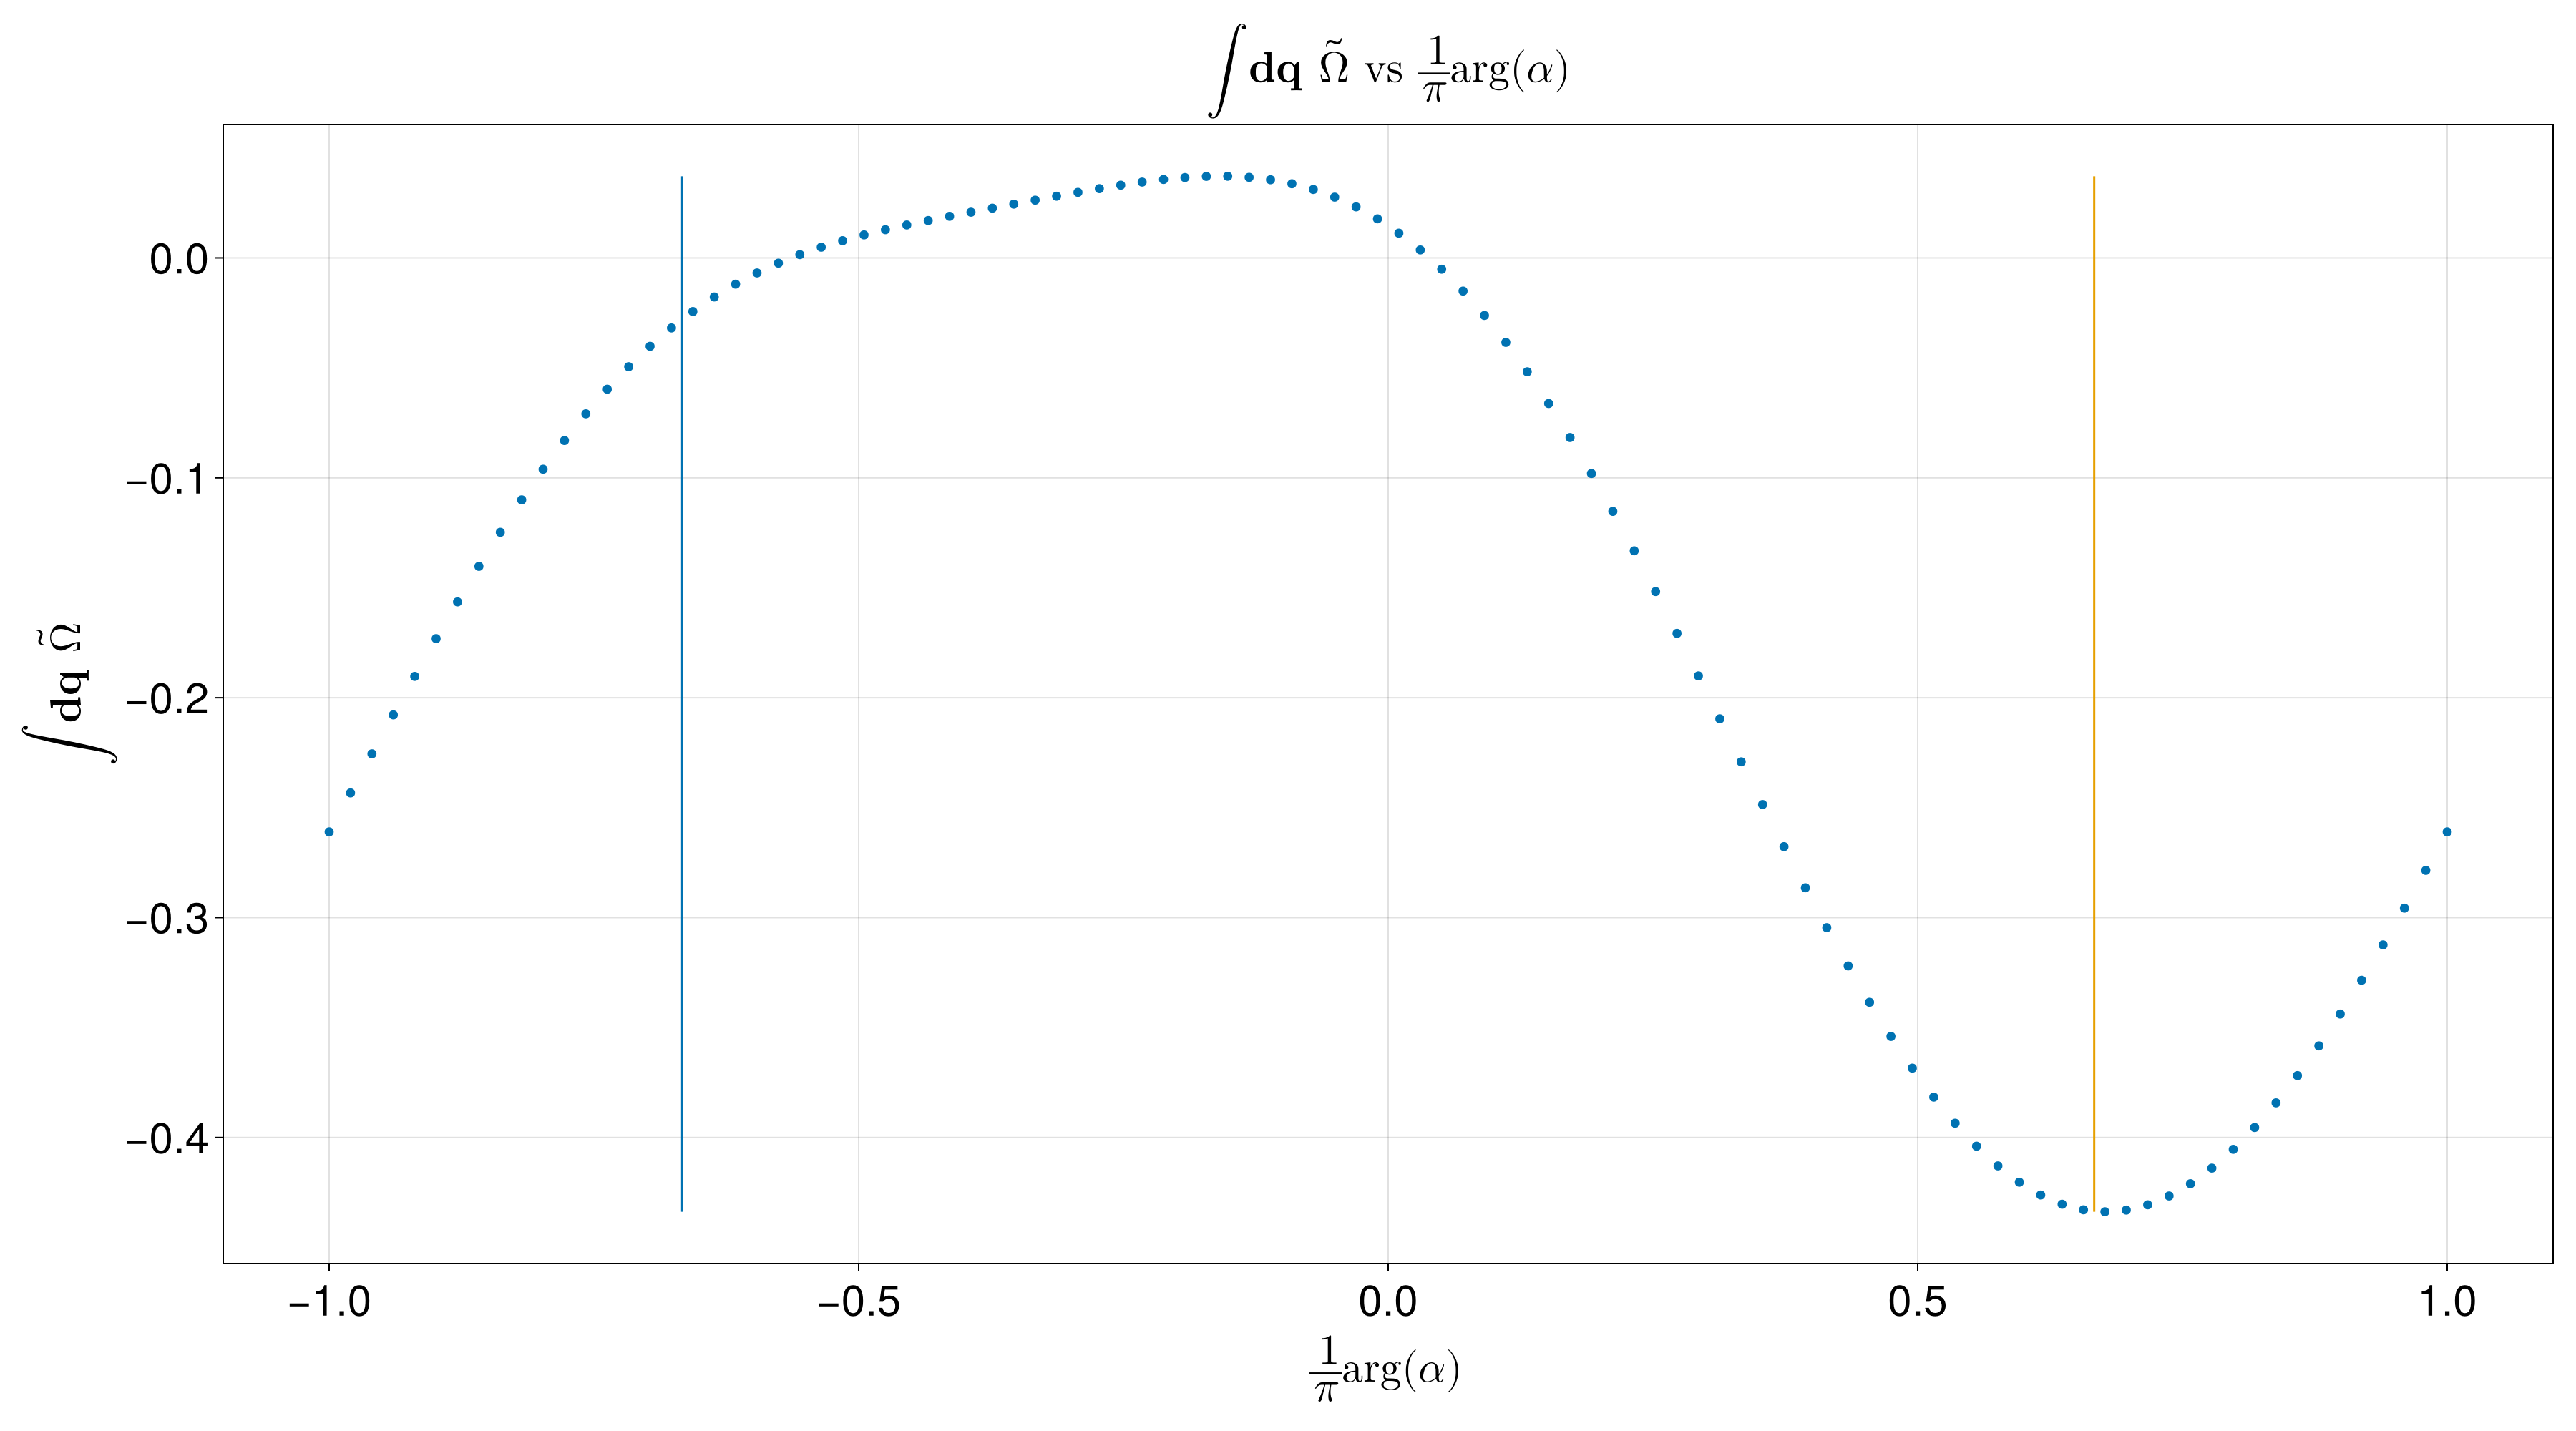

In [5]:
int_bc_delta(vF, delta)

In [4]:
function explicit_og_bc_vF(delta, alpha, index, vF)
    omega = exp(im * 2 * pi/ 3)
    k = index - 1
    v = vF
    
    nmz = 16 * real(omega^k * delta)^4 + 3 * abs(delta)^4 + 8 * real(delta^3) * real(omega^k * delta)
    
    return ((8 * sqrt(3) / nmz^2) * (8 * v * real(omega^k * delta)^3 - 12 * real(alpha * conj(delta)) * real(omega^k * delta)^2 + 
    3 * abs2(delta) * real(alpha * conj(delta)) + v * real(delta^3)) * (4 * real(omega^k * delta)^2 * imag(alpha * conj(delta)) + 
    4 * real(omega^k * delta) * imag(alpha * delta^2) - v * imag(delta^3) + abs2(delta) * imag(alpha * conj(delta))))
    
end

explicit_og_bc_vF (generic function with 1 method)

In [5]:
function int_bc_alpha(vF, alpha)
    rad = 0.1
    spacing = rad / 10^2
    n_pts = 10^2
    angles = range(-pi, pi, n_pts)
    integrated_list = Array{Float64}(undef, n_pts)
    for j in 1:n_pts
        grid = make_circle(rad, spacing)
        delta = exp(im * angles[j])
        # integrated_list[j] = area(spacing * sqrt(2), 4) * sum(bc_no_spinors(grid, spacing, vF, delta, alpha))
        integrated_list[j] = explicit_og_bc_vF(delta, alpha/2, 2, vF/2)
    end
    # filter mask for finite values only
    is_valid = isfinite.(integrated_list)

    # apply mask to both x and y
    x_valid = angles[is_valid]
    y_valid = integrated_list[is_valid]
    fig = Figure(size=(1800, 1000), fontsize=30)
    ax1 = Axis(fig[1, 1], title = L"\int \textbf{dq } \tilde{\Omega} \text{ vs } \frac{1}{\pi}\arg(\Delta)", 
    ylabel = L"\int \textbf{dq } \tilde{\Omega}", xlabel = L"\frac{1}{\pi}\arg(\Delta)")
    scatter!(ax1, 1/pi * x_valid, y_valid)
    lines!(ax1, -2/3 * ones(n_pts), integrated_list)
    lines!(ax1, 2/3 * ones(n_pts), integrated_list)
    lines!(ax1, 1/3 * ones(n_pts), integrated_list)
    lines!(ax1, -1/3 * ones(n_pts), integrated_list)
    lines!(ax1, 0 * ones(n_pts), integrated_list)
    fig
end

int_bc_alpha (generic function with 1 method)

In [8]:
vF = 1.5
alpha = 0.00132 * exp(-im * 2 * pi/7)

0.0008230065384535283 - 0.0010320175568577993im

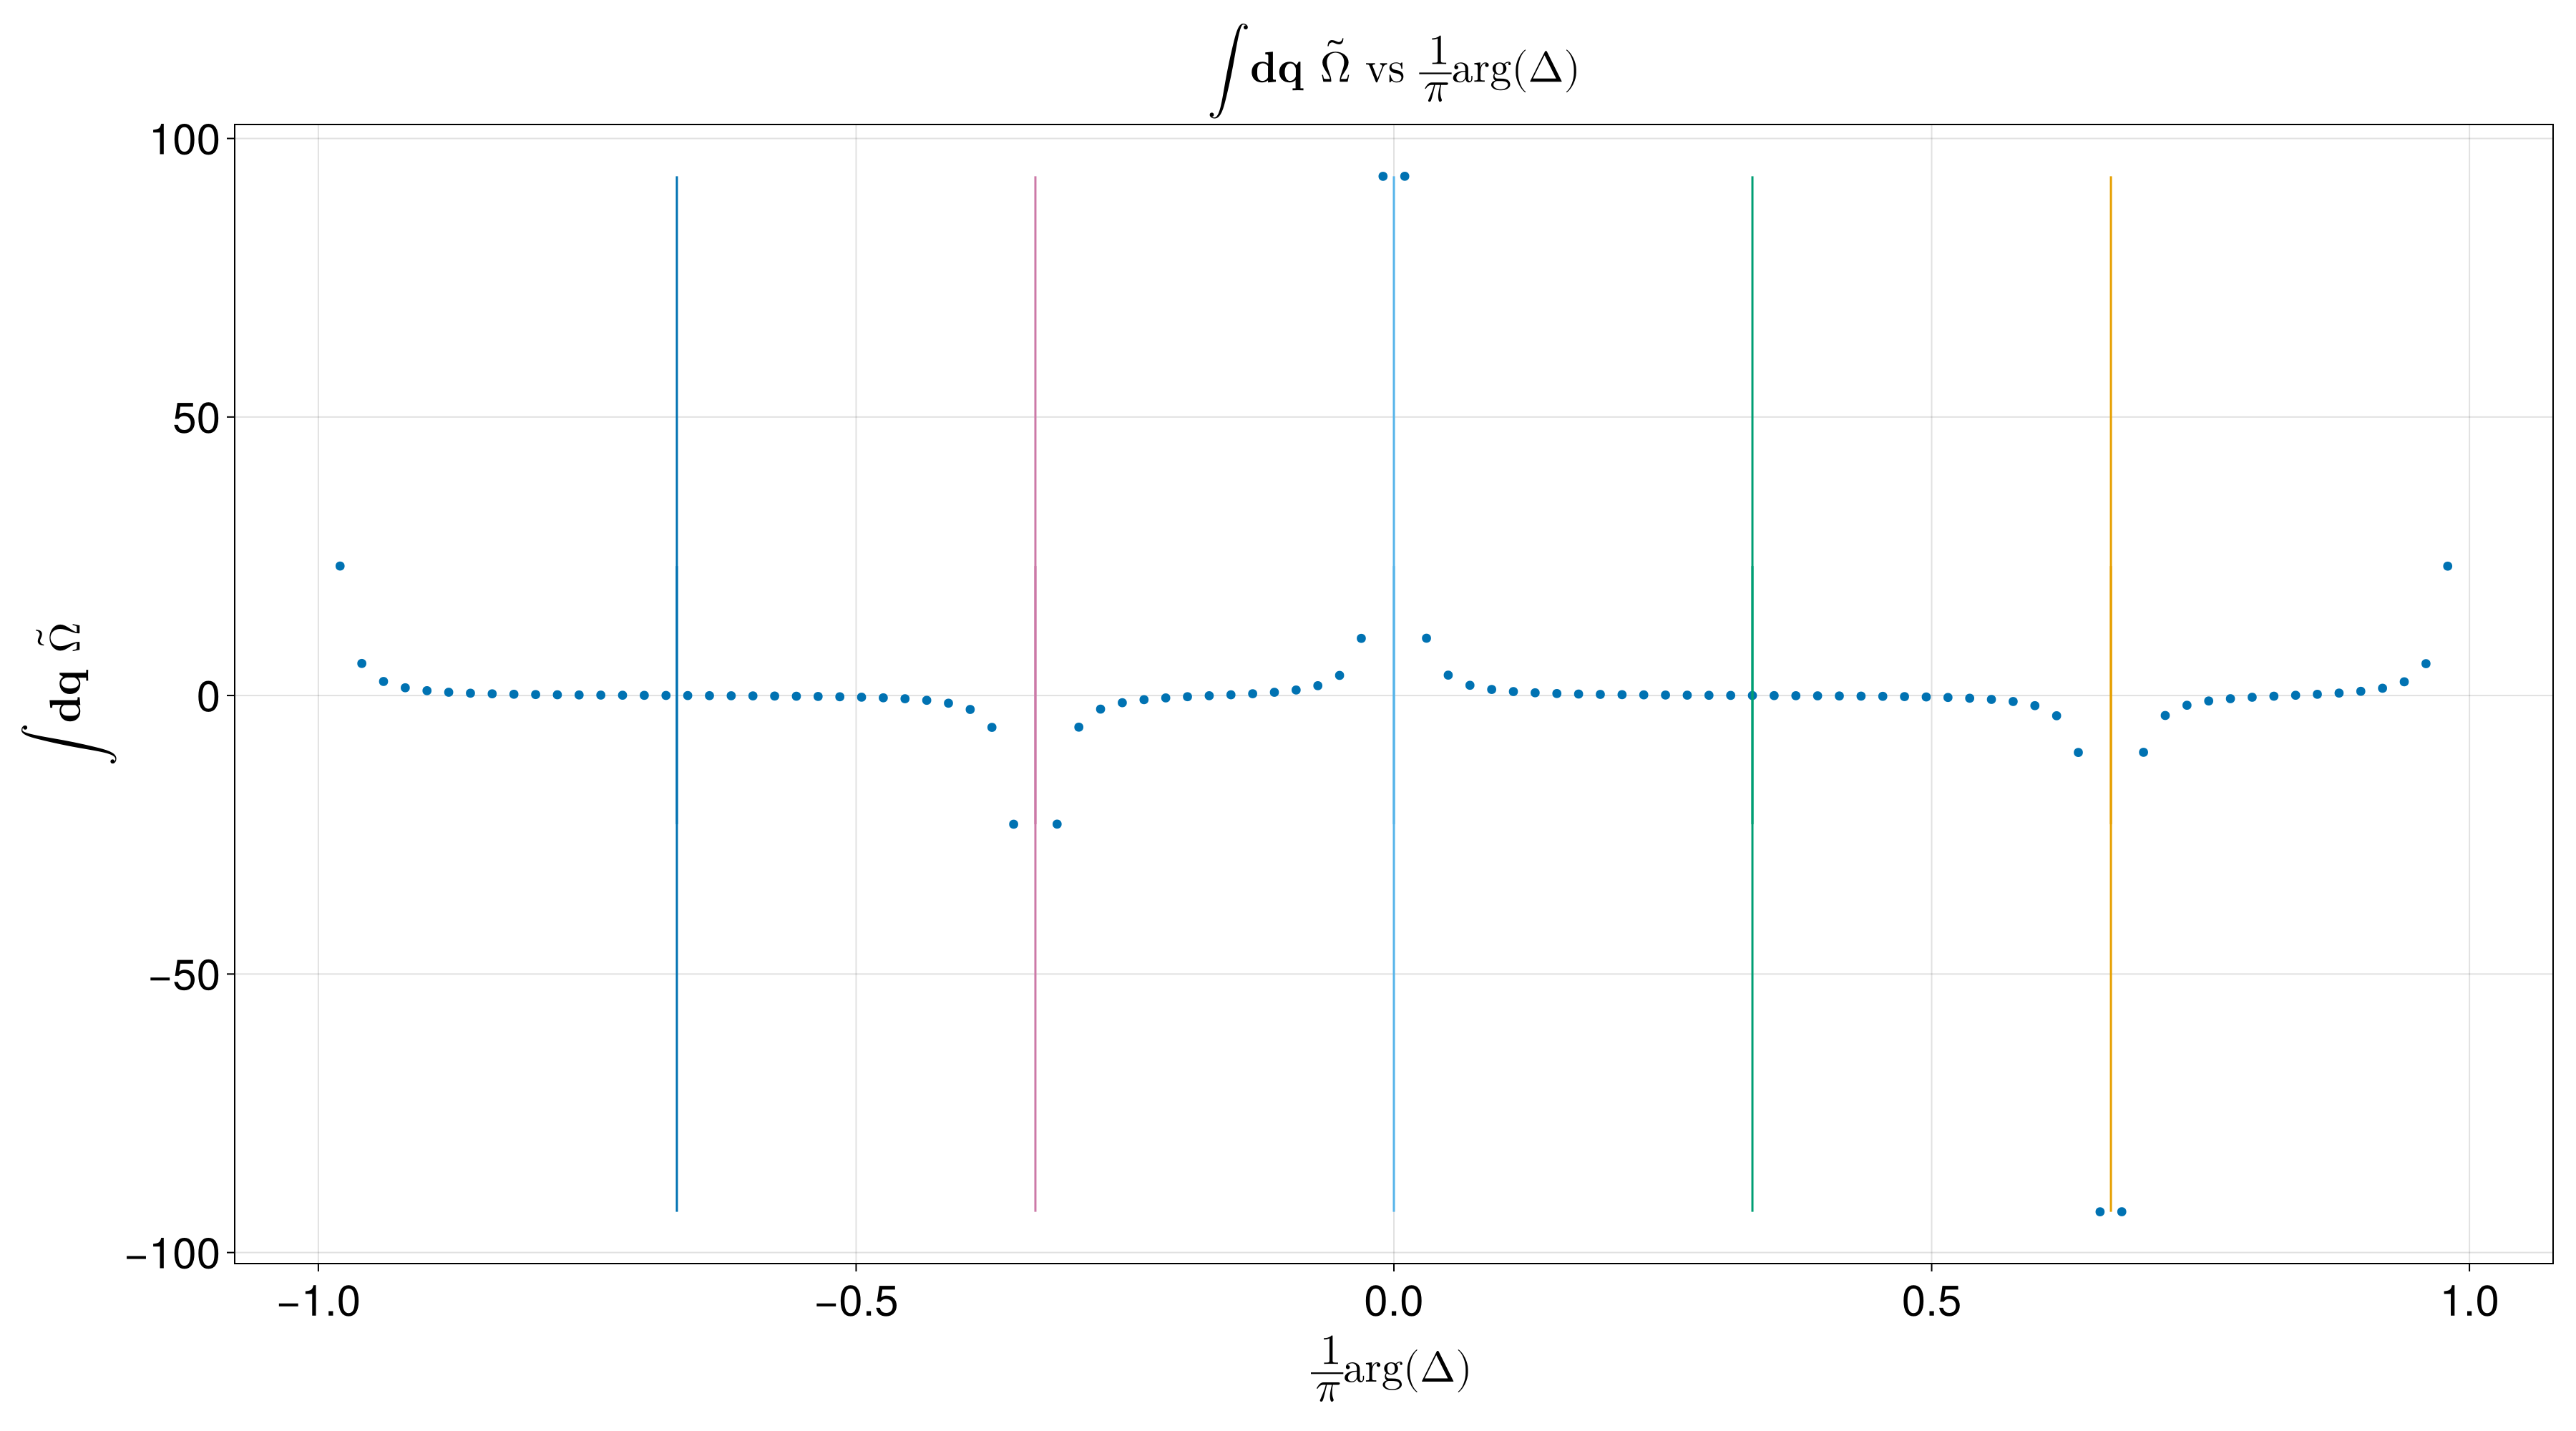

In [9]:
int_bc_alpha(vF, alpha)

## Monopole Study

In [6]:
function monopole_charges()
    k0_charges = Array{Float64}(undef, 4, 2)
    k0_charges[1, :] = [-2*pi/3, -1]
    k0_charges[2, :] = [-pi/3, 1]
    k0_charges[3, :] = [pi/3, -1]
    k0_charges[4, :] = [2*pi/3, 1]
    
    k1_charges = Array{Float64}(undef, 4, 2)
    k1_charges[1, :] = [-pi/3, -1]
    k1_charges[2, :] = [0, 1]
    k1_charges[3, :] = [2*pi/3, -1]
    k1_charges[4, :] = [pi, 1]

    k2_charges = Array{Float64}(undef, 4, 2)
    k2_charges[1, :] = [-2*pi/3, 1]
    k2_charges[2, :] = [0, -1]
    k2_charges[3, :] = [pi/3, 1]
    k2_charges[4, :] = [pi, -1]

    fig = Figure(size=(1800, 1000), fontsize=30)
    ax1 = Axis(fig[1, 1], title = L"\text{sgn}(Q_k) \text{ vs } \frac{1}{\pi}\arg(\Delta)", 
    ylabel = L"\text{sgn}(Q_k)", xlabel = L"\frac{1}{\pi}\arg(\Delta)")

    lines!(ax1, 1/pi * k0_charges[:, 1], k0_charges[:, 2], label = L"k = 0")
    lines!(ax1, 1/pi * k1_charges[:, 1], k1_charges[:, 2], label = L"k = 1")
    lines!(ax1, 1/pi * k2_charges[:, 1], k2_charges[:, 2], label = L"k = 2")

    scatter!(ax1, 1/pi * k0_charges[:, 1], k0_charges[:, 2], marker = :rect, markersize = 20)
    scatter!(ax1, 1/pi * k1_charges[:, 1], k1_charges[:, 2], marker = :rect, markersize = 20)
    scatter!(ax1, 1/pi * k2_charges[:, 1], k2_charges[:, 2], marker = :rect, markersize = 20)
    fig[1, 2] = Legend(fig, ax1, framevisible = true)
    fig
end

monopole_charges (generic function with 1 method)

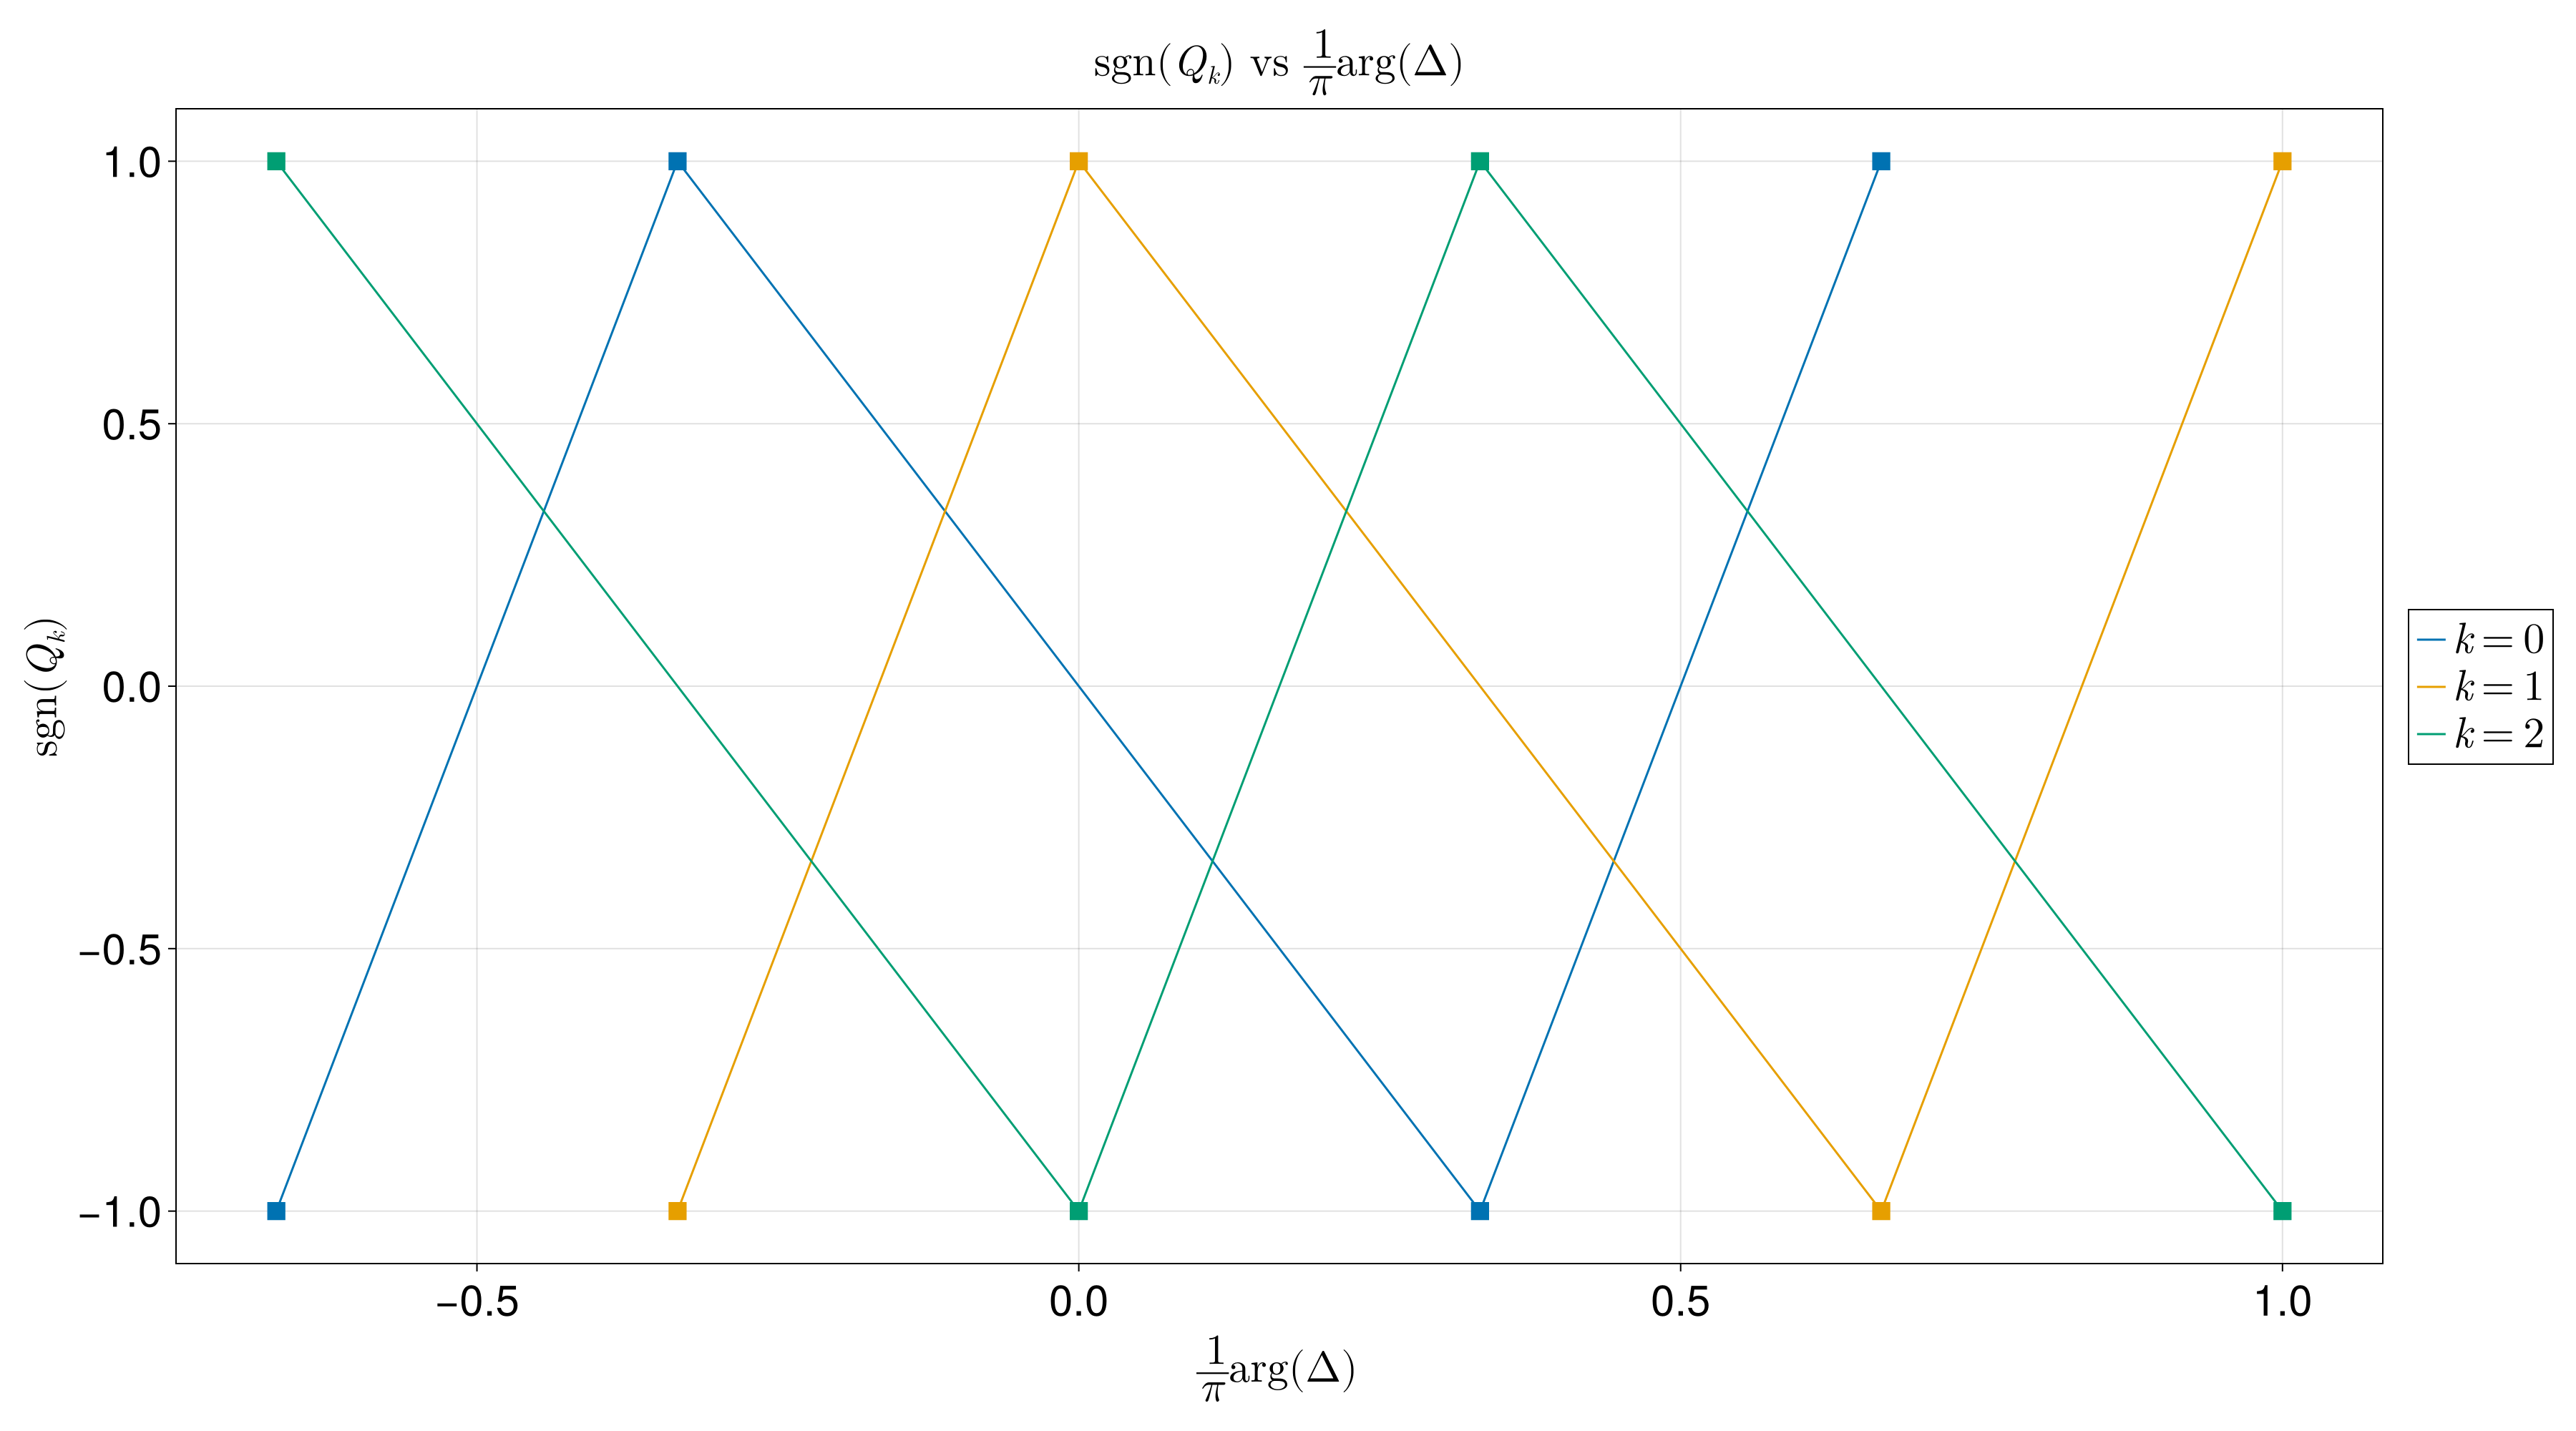

In [44]:
monopole_charges()

In [7]:
function monopole_charges()
    n0_charges = Array{Float64}(undef, 3, 2)
    n0_charges[1, :] = [-2*pi/3, 1]
    n0_charges[2, :] = [0, 1]
    n0_charges[3, :] = [2*pi/3, 1]
    
    n1_charges = Array{Float64}(undef, 6, 2)
    n1_charges[1, :] = [-2*pi/3, -1]
    n1_charges[2, :] = [-pi/3, 1]
    n1_charges[3, :] = [0, -1]
    n1_charges[4, :] = [pi/3, 1]
    n1_charges[5, :] = [2*pi/3, -1]
    n1_charges[6, :] = [pi, 1]

    n2_charges = Array{Float64}(undef, 3, 2)
    n2_charges[1, :] = [-pi/3, -1]
    n2_charges[2, :] = [pi/3, -1]
    n2_charges[3, :] = [pi, -1] 

    fig = Figure(size=(1800, 1000), fontsize=30)
    ax1 = Axis(fig[1, 1], title = L"\text{sgn}(Q_n) \text{ vs } \frac{1}{\pi}\arg(\Delta)", 
    ylabel = L"\text{sgn}(Q_n)", xlabel = L"\frac{1}{\pi}\arg(\Delta)")

    lines!(ax1, 1/pi * n0_charges[:, 1], n0_charges[:, 2], label = L"n = 0")
    lines!(ax1, 1/pi * n1_charges[:, 1], n1_charges[:, 2], label = L"n = 1")
    lines!(ax1, 1/pi * n2_charges[:, 1], n2_charges[:, 2], label = L"n = 2")

    scatter!(ax1, 1/pi * n0_charges[:, 1], n0_charges[:, 2], marker = :rect, markersize = 20)
    scatter!(ax1, 1/pi * n1_charges[:, 1], n1_charges[:, 2], marker = :rect, markersize = 20)
    scatter!(ax1, 1/pi * n2_charges[:, 1], n2_charges[:, 2], marker = :rect, markersize = 20)
    fig[1, 2] = Legend(fig, ax1, framevisible = true)
    fig
end

monopole_charges (generic function with 1 method)

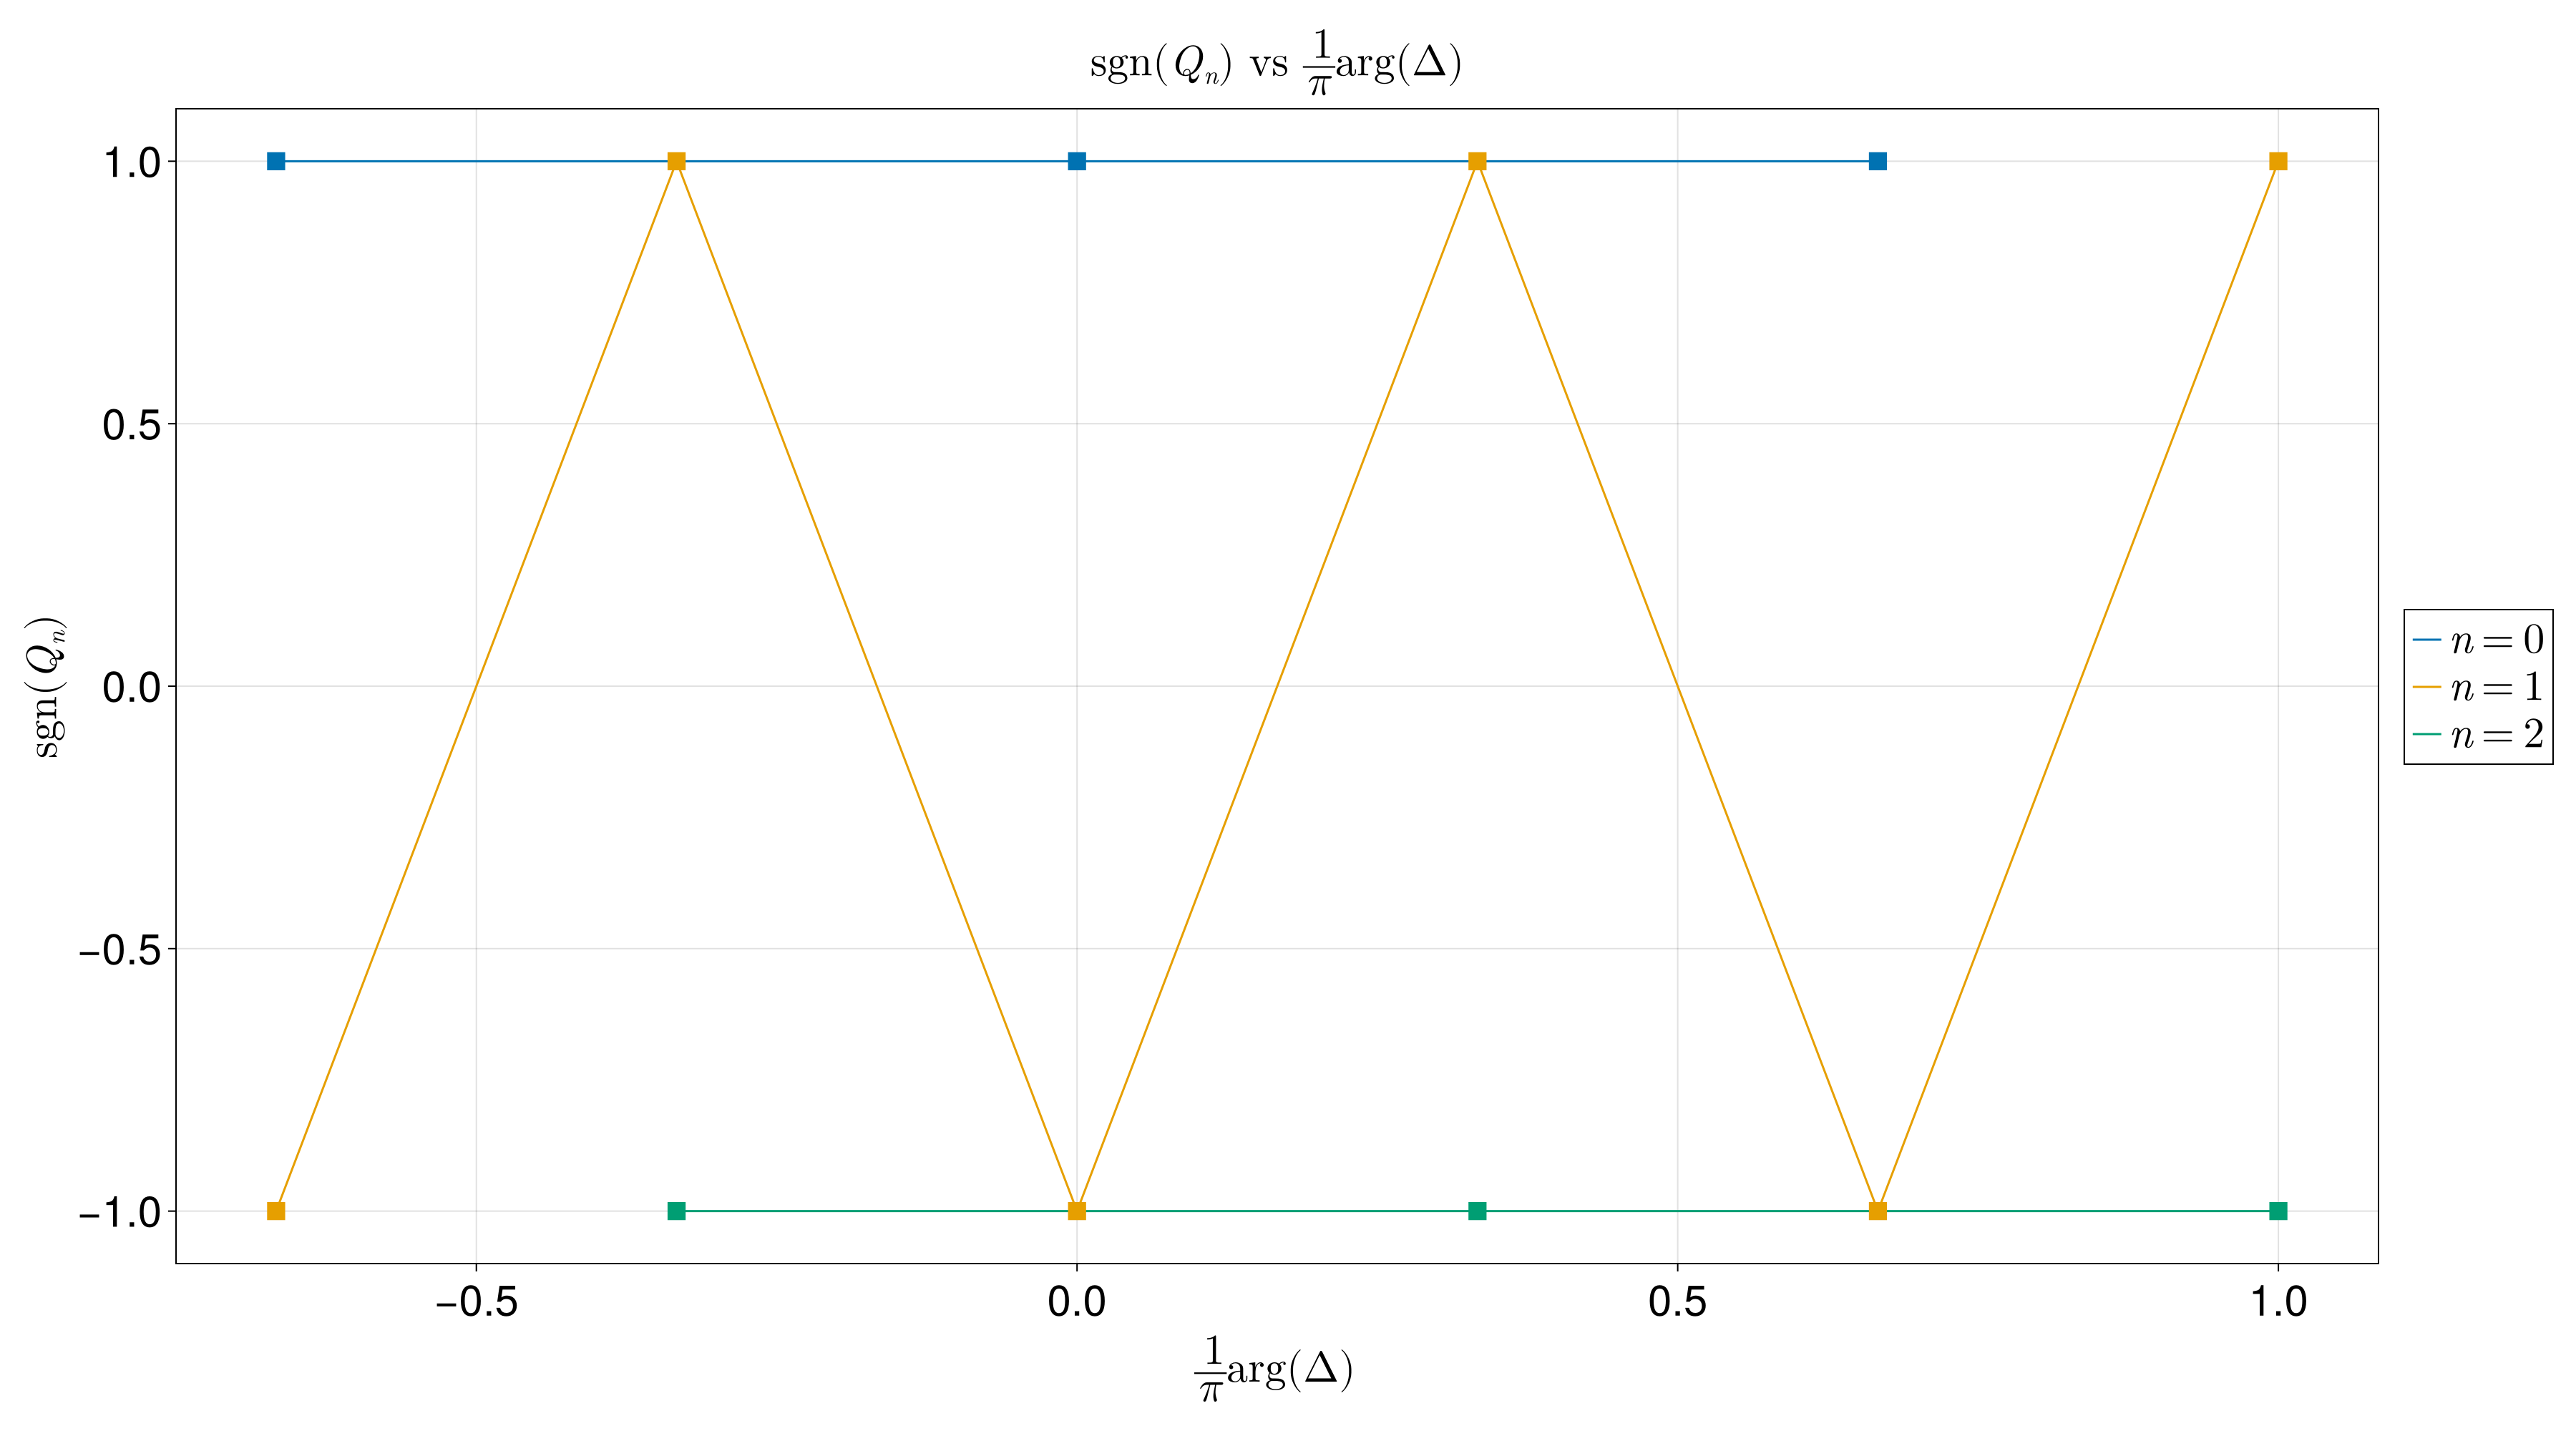

In [547]:
monopole_charges()

## Change in Berry Curvature at the Origin

In [8]:
function bc_changes_ground()
    # n0_charges = Array{Float64}(undef, 3, 2)
    # n0_charges[1, :] = [-2*pi/3, 1]
    # n0_charges[2, :] = [0, 1]
    # n0_charges[3, :] = [2*pi/3, 1]
    
    # n1_charges = Array{Float64}(undef, 6, 2)
    # n1_charges[1, :] = [-2*pi/3, -1]
    # n1_charges[2, :] = [-pi/3, 1]
    # n1_charges[3, :] = [0, -1]
    # n1_charges[4, :] = [pi/3, 1]
    # n1_charges[5, :] = [2*pi/3, -1]
    # n1_charges[6, :] = [pi, 1]

    # n2_charges = Array{Float64}(undef, 3, 2)
    # n2_charges[1, :] = [-pi/3, -1]
    # n2_charges[2, :] = [pi/3, -1]
    # n2_charges[3, :] = [pi, -1] 

    fig = Figure(size=(1800, 1000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    ax1 = Axis(fig[1, 1], title = L"\tilde{\Omega}_0(0, 0) \text{ vs } \frac{1}{\pi}\arg(\Delta)", 
    ylabel = L"\tilde{\Omega}_0(0, 0)", xlabel = L"\frac{1}{\pi}\arg(\Delta)"; xgridvisible = false, ygridvisible = false, 
    yticks = ([0.0], ["0"]), xticks = ([-1, -2/3, -1/3, 0, 1/3, 2/3, 1], ["-1", "-2/3", "-1/3", "0", "1/3", "2/3", "1"]))

    brick_red = colorant"#CB4154"
    # Plot berry curvature

    angles_L1 = range(-0.99 * 2*pi/3, -0.020944, 10^4)
    lines!(ax1, 1/pi * angles_L1, -tan.(3/2 * (angles_L1 .+ pi/3)), color = (brick_red, 1); linewidth = 7)

    angles_L2 = range(-0.99 * pi, -1.01 * 2*pi/3, 10^4)
    lines!(ax1, 1/pi * angles_L2, -tan.(3/2 * (angles_L2 .+ pi/3)), color = (brick_red, 1); linewidth = 7)

    angles_R1 = range(0.020944, 0.99 * 2*pi/3, 10^4)
    lines!(ax1, 1/pi * angles_R1, -tan.(3/2 * (angles_R1 .+ pi/3)), color = (brick_red, 1); linewidth = 7)

    angles_R2 = range(1.01 * 2*pi/3, 0.99 * pi, 10^4)
    lines!(ax1, 1/pi * angles_R2, -tan.(3/2 * (angles_R2 .+ pi/3)), color = (brick_red, 1); linewidth = 7)

    # Plot asymptotes
    lines!(ax1, zeros(length(angles_L1)), 1.04 * (-tan.(3/2 * (angles_L1 .+ pi/3))), color = (:black, 0.5); 
    linestyle = (:dash, :dense), linewidth = 5)

    lines!(ax1, -2/3 * ones(length(angles_L1)), 1.04 * (-tan.(3/2 * (angles_L1 .+ pi/3))), color = (:black, 0.5); 
    linestyle = (:dash, :dense), linewidth = 5)

    lines!(ax1, 2/3 * ones(length(angles_L1)), 1.04 * (-tan.(3/2 * (angles_L1 .+ pi/3))), color = (:black, 0.5); 
    linestyle = (:dash, :dense), linewidth = 5)

    angles = range(-0.99 * pi, 0.99 * pi, 10^4)
    lines!(ax1, 1/pi * angles, zeros(length(angles)), color = (:black, 0.5); 
    linestyle = (:dash, :dense), linewidth = 5)

    # lines!(ax1, phase_b1[1, :], phase_b1[2, :], color = :black; linestyle = (:dash, :dense), linewidth = 7)
    fig
end

bc_changes_ground (generic function with 1 method)

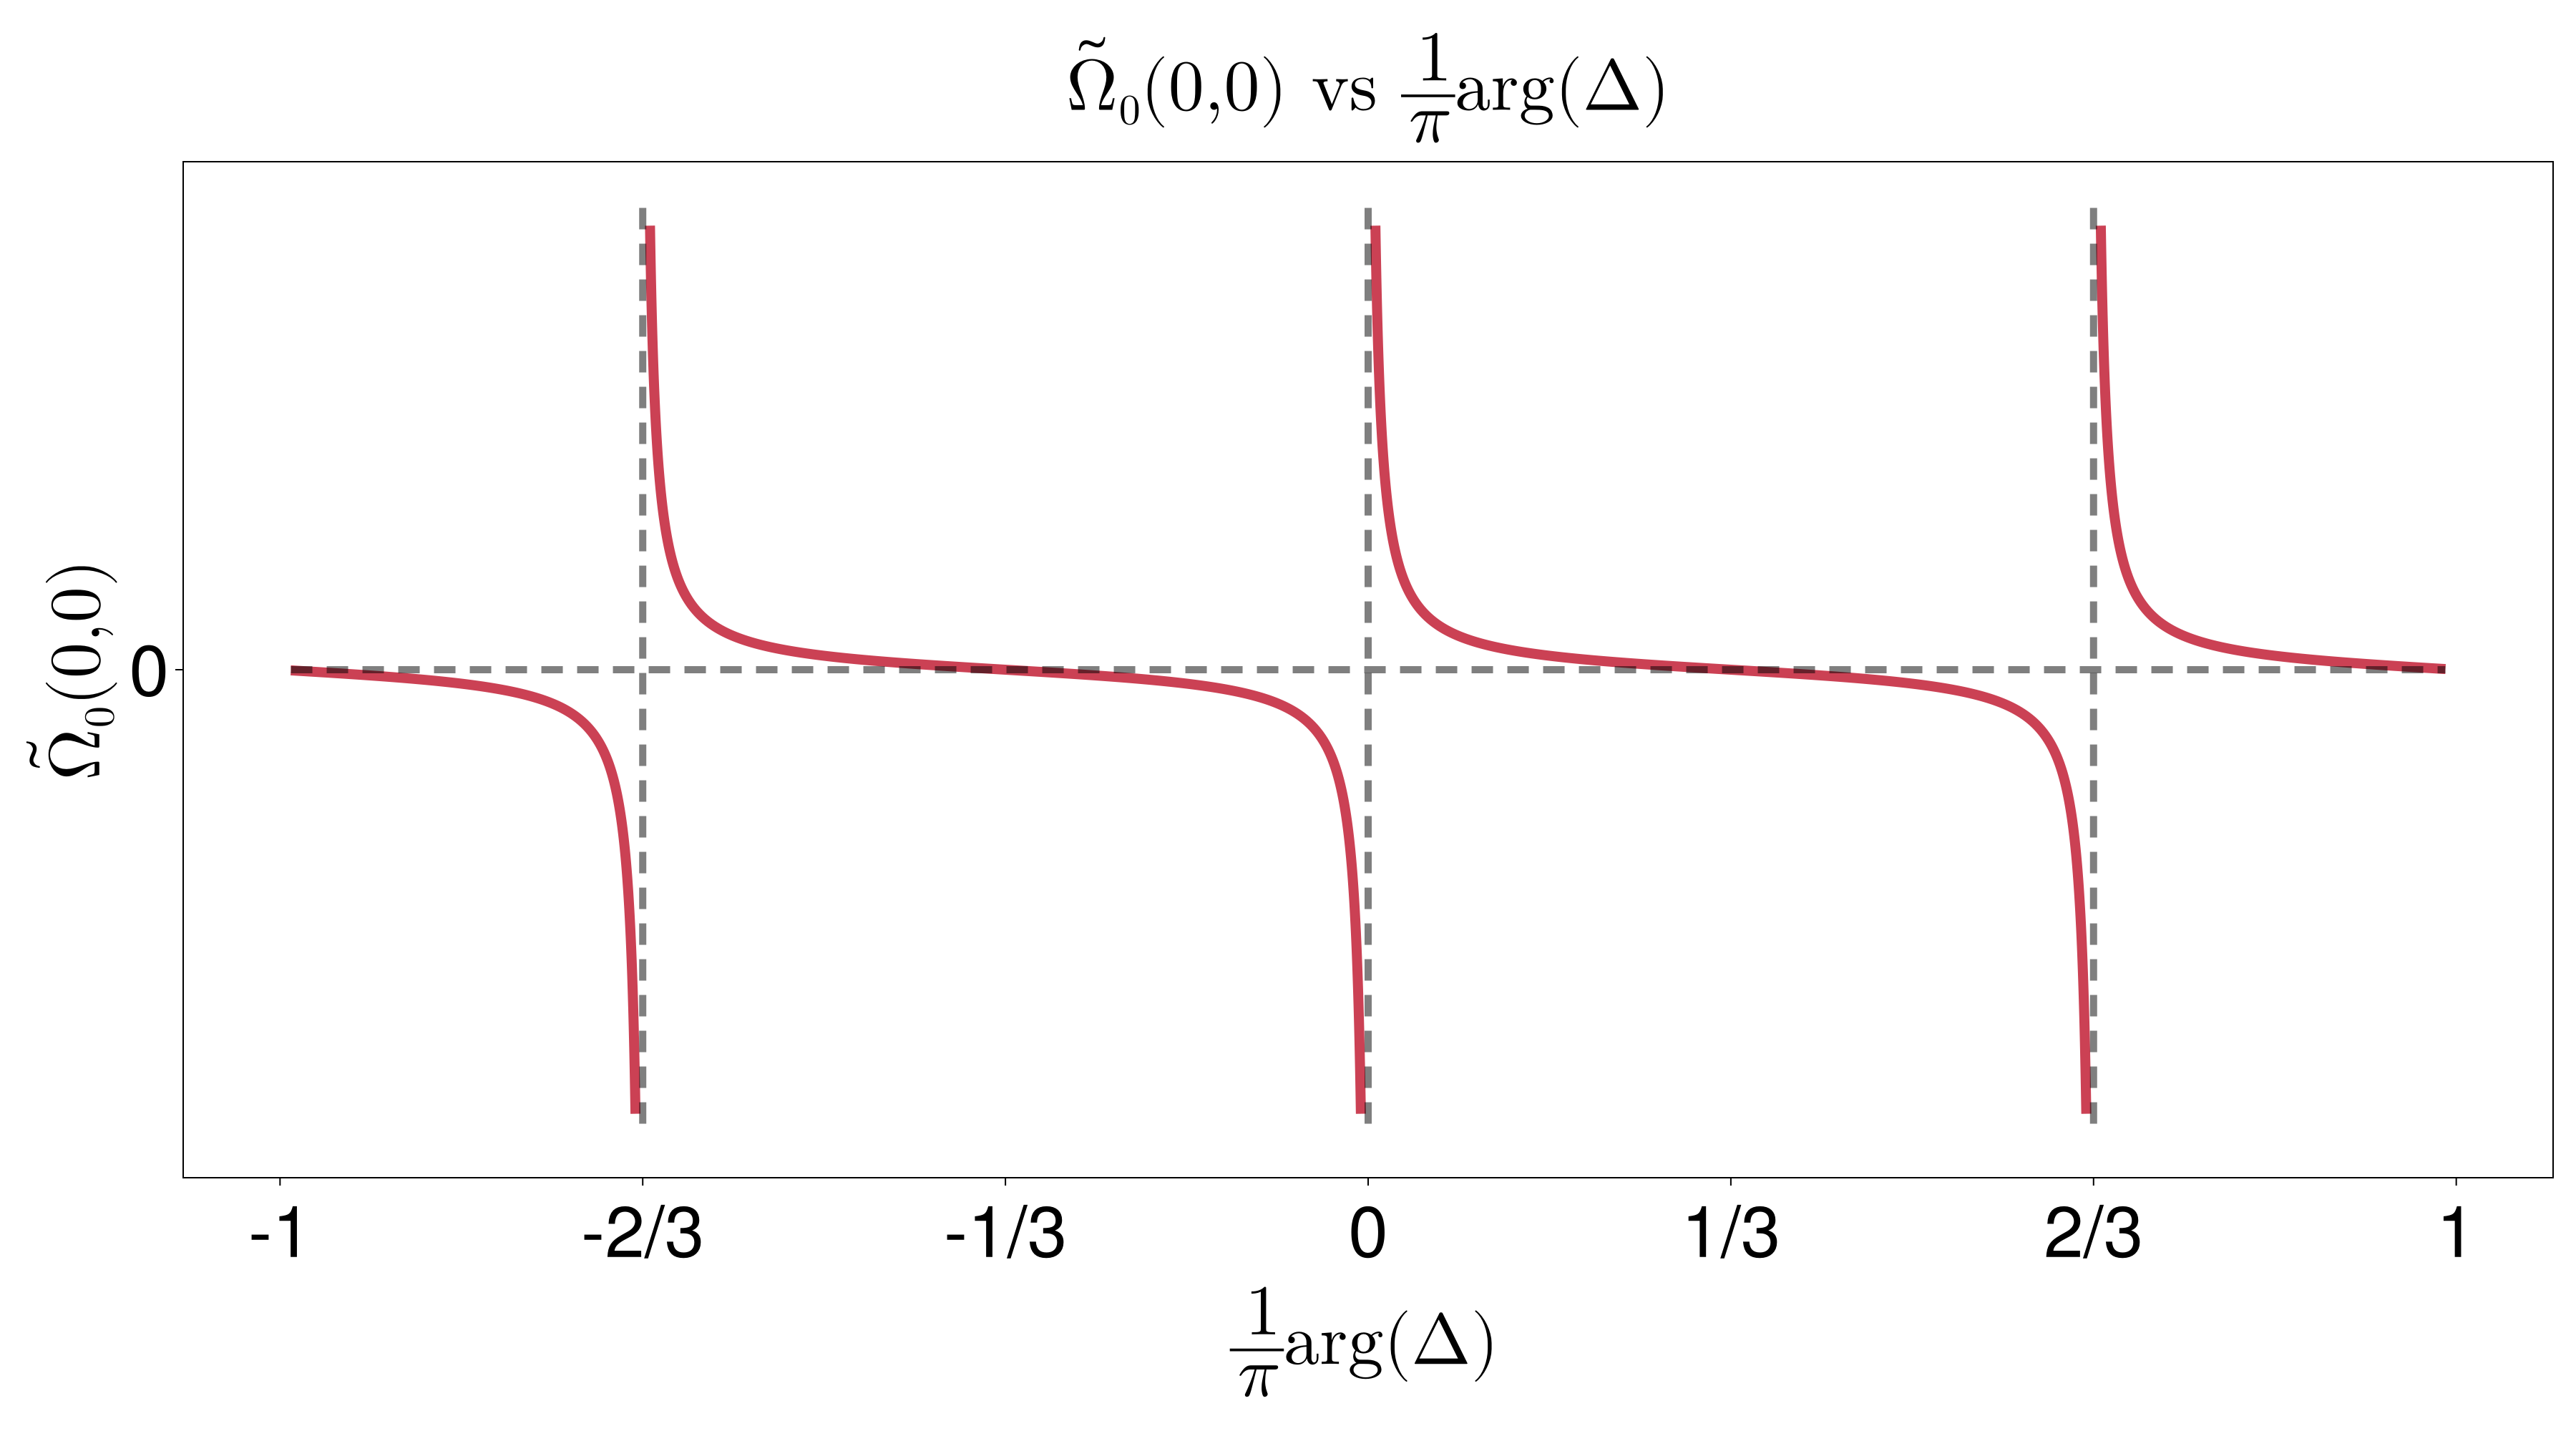

In [210]:
bc_changes_ground()

In [9]:
function bc_changes_mid()
    # n0_charges = Array{Float64}(undef, 3, 2)
    # n0_charges[1, :] = [-2*pi/3, 1]
    # n0_charges[2, :] = [0, 1]
    # n0_charges[3, :] = [2*pi/3, 1]
    
    # n1_charges = Array{Float64}(undef, 6, 2)
    # n1_charges[1, :] = [-2*pi/3, -1]
    # n1_charges[2, :] = [-pi/3, 1]
    # n1_charges[3, :] = [0, -1]
    # n1_charges[4, :] = [pi/3, 1]
    # n1_charges[5, :] = [2*pi/3, -1]
    # n1_charges[6, :] = [pi, 1]

    # n2_charges = Array{Float64}(undef, 3, 2)
    # n2_charges[1, :] = [-pi/3, -1]
    # n2_charges[2, :] = [pi/3, -1]
    # n2_charges[3, :] = [pi, -1] 

    fig = Figure(size=(1800, 1000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    ax1 = Axis(fig[1, 1], title = L"\tilde{\Omega}_1(0, 0) \text{ vs } \frac{1}{\pi}\arg(\Delta)", 
    ylabel = L"\tilde{\Omega}_1(0, 0)", xlabel = L"\frac{1}{\pi}\arg(\Delta)"; xgridvisible = false, ygridvisible = false, 
    yticks = ([0.0], ["0"]), xticks = ([-1, -2/3, -1/3, 0, 1/3, 2/3, 1], ["-1", "-2/3", "-1/3", "0", "1/3", "2/3", "1"]))

    brick_red = colorant"#CB4154"
    # Plot berry curvature

    angles_L1 = range(-0.99 * pi/3, -0.010472, 10^4)
    lines!(ax1, 1/pi * angles_L1, tan.(3 * (angles_L1 .+ pi/6)), color = (brick_red, 1); linewidth = 7)

    angles_L2 = range(-0.995 * 2*pi/3, -1.01 * pi/3, 10^4)
    lines!(ax1, 1/pi * angles_L2, tan.(3 * (angles_L2 .+ pi/6)), color = (brick_red, 1); linewidth = 7)

    angles_L3 = range(-0.99667 * pi, -1.005 * 2*pi/3 , 10^4)
    lines!(ax1, 1/pi * angles_L3, tan.(3 * (angles_L3 .+ pi/6)), color = (brick_red, 1); linewidth = 7)

    angles_R1 = range(0.010472, 0.99 * pi/3, 10^4)
    lines!(ax1, 1/pi * angles_R1, tan.(3 * (angles_R1 .+ pi/6)), color = (brick_red, 1); linewidth = 7)

    angles_R2 = range(1.01 * pi/3, 0.995 * 2*pi/3, 10^4)
    lines!(ax1, 1/pi * angles_R2, tan.(3 * (angles_R2 .+ pi/6)), color = (brick_red, 1); linewidth = 7)

    angles_R3 = range(1.005 * 2*pi/3, 0.99667 * pi, 10^4)
    lines!(ax1, 1/pi * angles_R3, tan.(3 * (angles_R3 .+ pi/6)), color = (brick_red, 1); linewidth = 7)

    # Plot asymptotes
    lines!(ax1, zeros(length(angles_L1)), 1.04 * (tan.(3 * (angles_L1 .+ pi/6))), color = (:black, 0.5); 
    linestyle = (:dash, :dense), linewidth = 5)

    lines!(ax1, -2/3 * ones(length(angles_L1)), 1.04 * (tan.(3 * (angles_L1 .+ pi/6))), color = (:black, 0.5); 
    linestyle = (:dash, :dense), linewidth = 5)

    lines!(ax1, 2/3 * ones(length(angles_L1)), 1.04 * (tan.(3 * (angles_L1 .+ pi/6))), color = (:black, 0.5); 
    linestyle = (:dash, :dense), linewidth = 5)

    lines!(ax1, -1/3 * ones(length(angles_L1)), 1.04 * (tan.(3 * (angles_L1 .+ pi/6))), color = (:black, 0.5); 
    linestyle = (:dash, :dense), linewidth = 5)

    lines!(ax1, 1/3 * ones(length(angles_L1)), 1.04 * (tan.(3 * (angles_L1 .+ pi/6))), color = (:black, 0.5); 
    linestyle = (:dash, :dense), linewidth = 5)

    angles = range(-0.99 * pi, 0.99 * pi, 10^4)
    lines!(ax1, 1/pi * angles, zeros(length(angles)), color = (:black, 0.5); 
    linestyle = (:dash, :dense), linewidth = 5)

    lines!(ax1, ones(length(angles_L1)), abs.(1.04 * (tan.(3 * (angles_L1 .+ pi/6)))), color = (:black, 0.5); 
    linestyle = (:dash, :dense), linewidth = 5)

    lines!(ax1, -ones(length(angles_L1)), -abs.(1.04 * (tan.(3 * (angles_L1 .+ pi/6)))), color = (:black, 0.5); 
    linestyle = (:dash, :dense), linewidth = 5)

    # lines!(ax1, phase_b1[1, :], phase_b1[2, :], color = :black; linestyle = (:dash, :dense), linewidth = 7)
    fig
end

bc_changes_mid (generic function with 1 method)

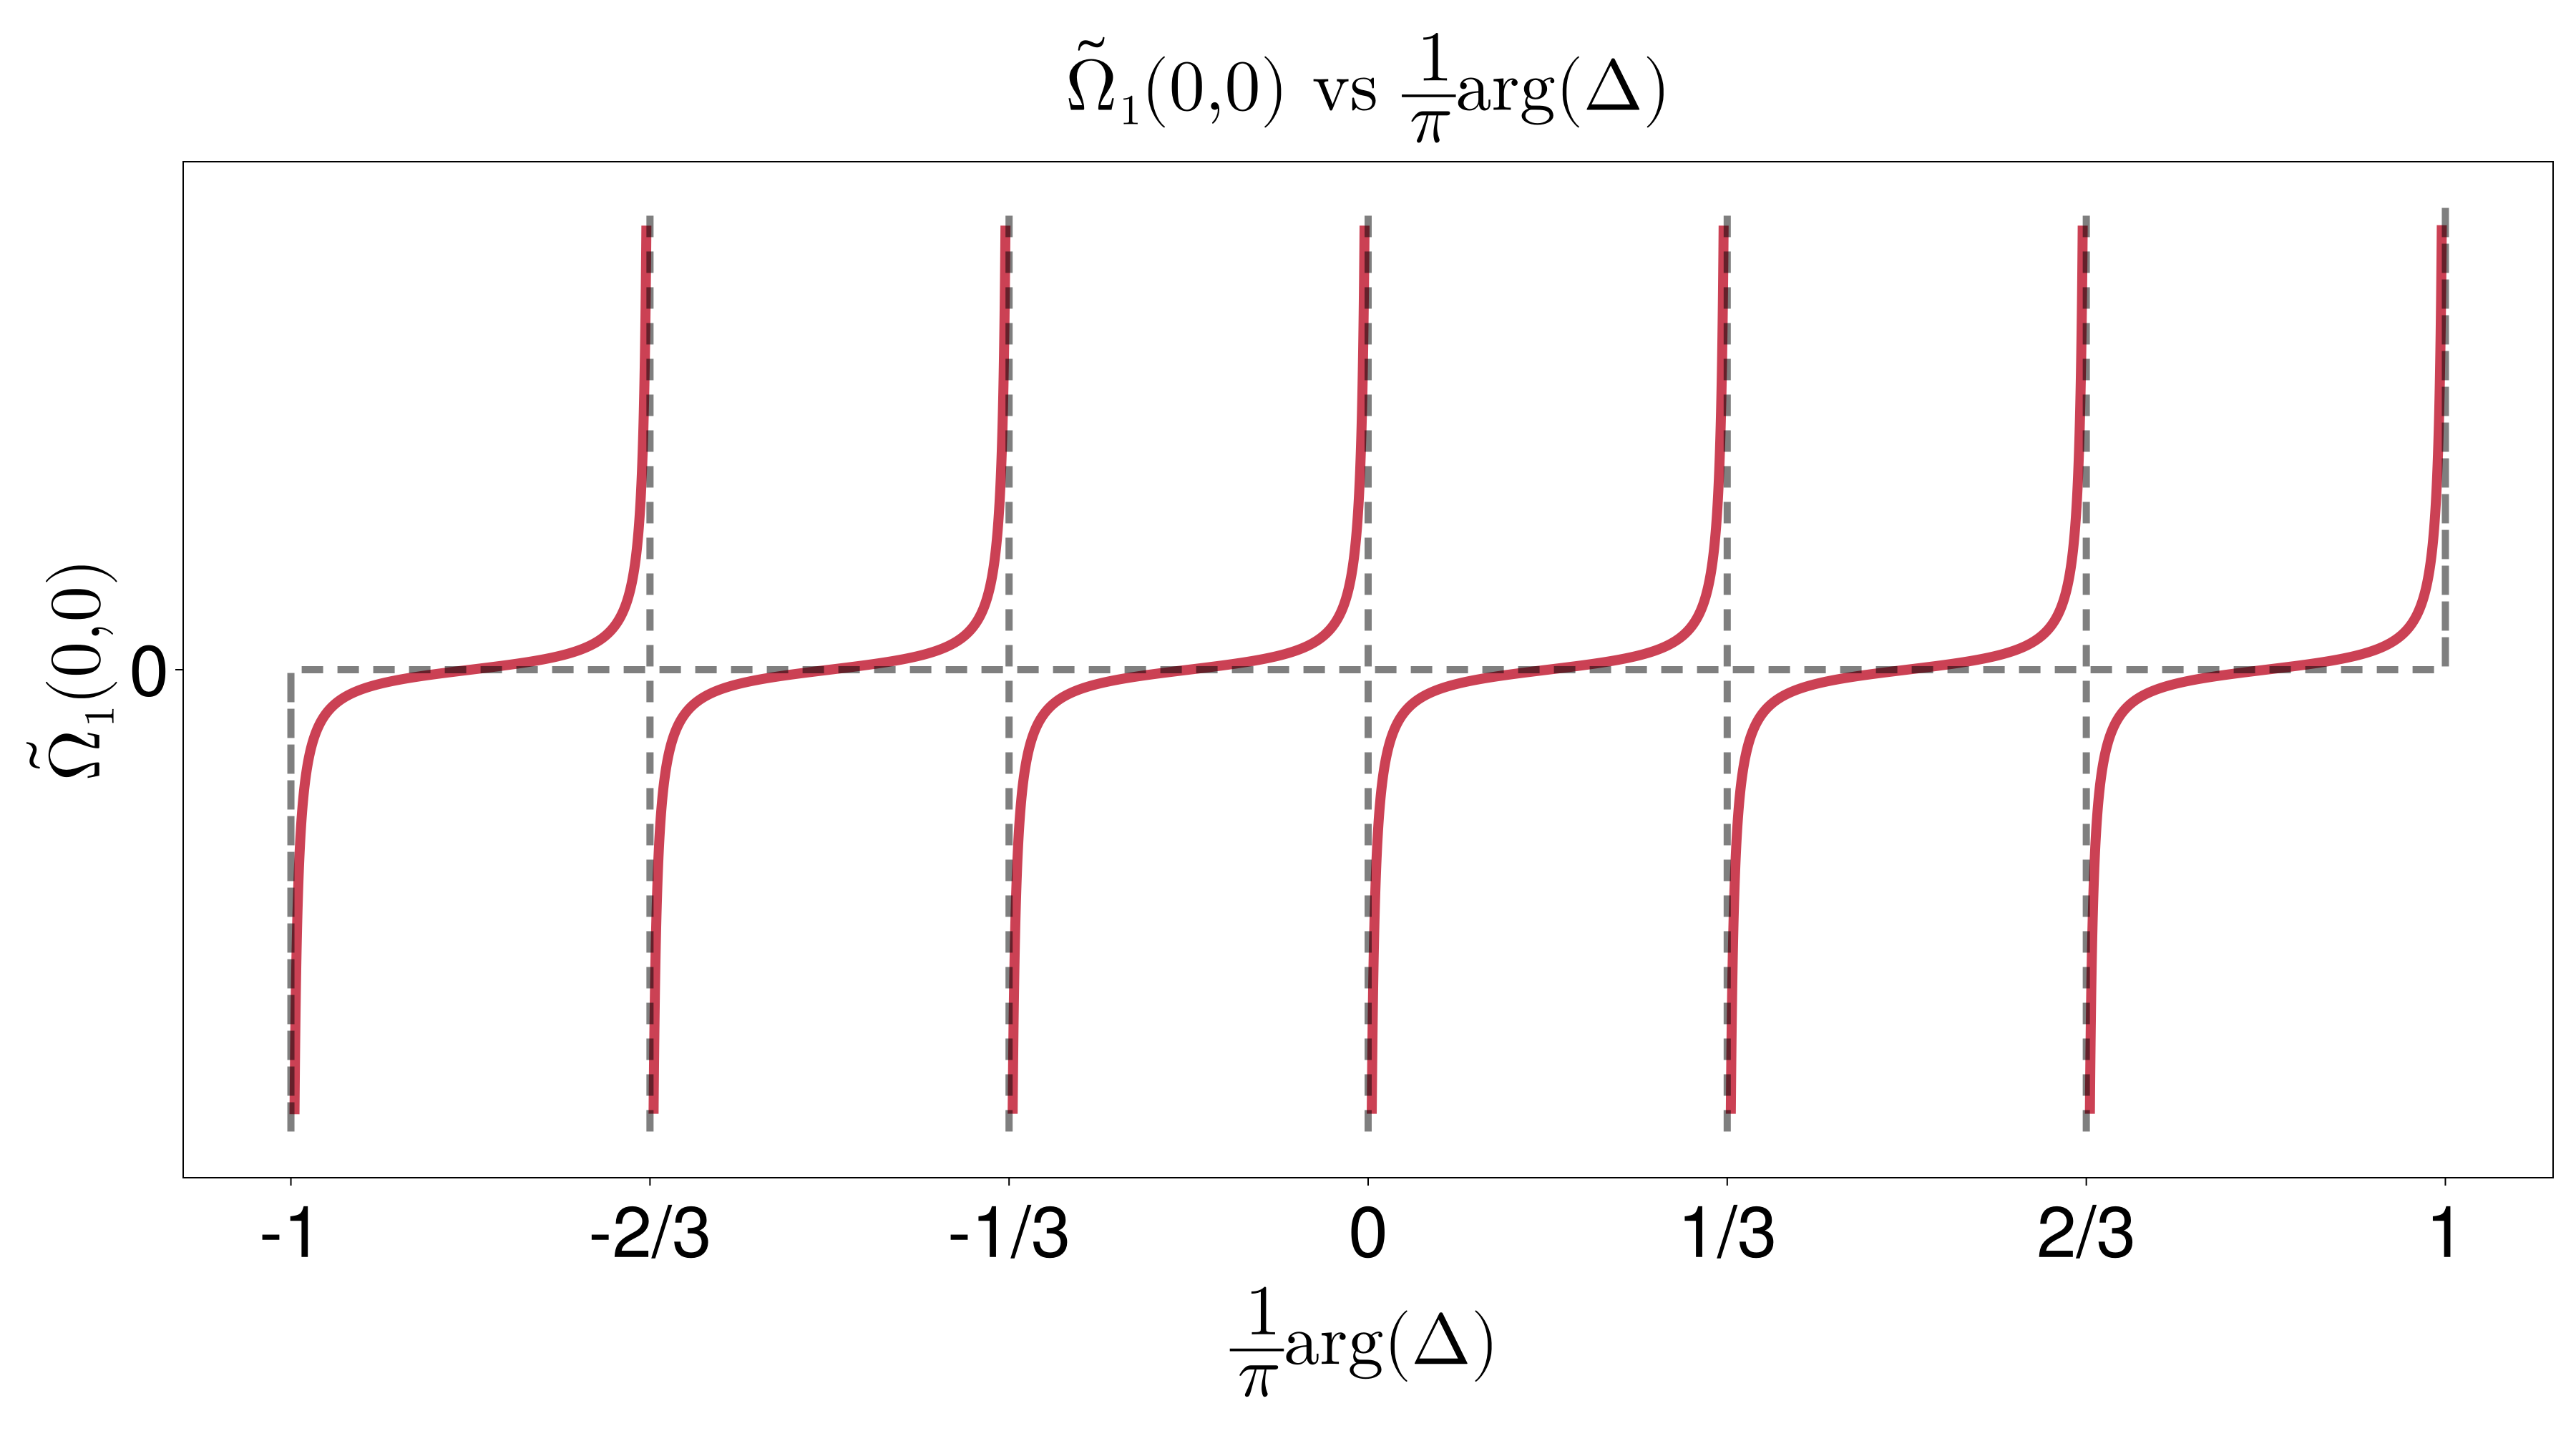

In [299]:
bc_changes_mid()

# Numerical Computation of Integrated Berry Curvature

The computation of integrated Berry Curvature will go as follows. Note that we still need to figure out if it's appropriate to index Berry curvatures using $k$.
$
\begin{align}
\oiint_{0 < r < \infty, \varphi} \tilde{\Omega}(q_x, q_y) dA &= \oiint_{0 < r \infty, \varphi} \nabla \times \tilde{A}(q_x, q_y) dA \\
&= \oint_{r \rightarrow \infty, \varphi} \tilde{A}(q_x, q_y) \cdot \vec{d\ell} \\
&= \oint_{r \rightarrow \infty, \varphi} r \left(- \sin \varphi \tilde{A}_x(r \cos \varphi, r \sin \varphi) + \cos \varphi \tilde{A}_y (r \cos \varphi, r \sin \varphi) \right) \\
&= \lim_{r \rightarrow \infty} \int_0^{2 \pi} d\varphi \ r \left(- \sin \varphi \tilde{A}_x(r \cos \varphi, r \sin \varphi) + \cos \varphi \tilde{A}_y (r \cos \varphi, r \sin \varphi) \right)
\end{align}
$

Then recall that we have defined the Berry connection $\tilde{A}$ as follows:
$
\begin{align}
\tilde{A} &= i \langle u(q_x, q_y)| \nabla | u(q_x, q_y) \rangle
\end{align}
$

To compute this derivative, we implement difference quotients

### Derivatives and finite difference convergence

In [10]:
function nmz_comp(delta, alpha, k, index, vF)
    epsilon = vF_analytic_eigenvalues(alpha, delta, k[1], k[2], vF)[index]
    # convenience
    v = vF/2
    omega = exp(im * 2 * pi/ 3)
    q = k[1] + im * k[2]
    # variables
    f1 = delta + alpha * (q + conj(q))
    v1 = v * (q + conj(q))
    f3 = delta + alpha * (omega * q + conj(omega * q))
    v3 = v * (omega * q + conj(omega * q))
    f5 = delta + alpha * (conj(omega) * q + omega * conj(q))
    v5 = v * (conj(omega) * q + omega * conj(q))
    # normalization
    nmz = (((epsilon - v5) * (epsilon - v3) - abs2(f1))^2 + abs2(f1) * (abs2(f3) + abs2(f5)) + 
    2 * real(f1 * f3 * f5) * (2 * epsilon - v3 - v5) + abs2(f3) * (epsilon - v3)^2 + abs2(f5) * (epsilon - v5)^2)
    
    return nmz
end

nmz_comp (generic function with 1 method)

In [11]:
function d_nmz_conv(delta, alpha, k, index, vF)
    nmz0 = nmz_comp(delta, alpha, k, index, vF)

    n_pts = 10^2
    log_dx_list = range(2, 9, n_pts)
    dx_list = 10 .^log_dx_list
    log_dy_list = range(2, 9, n_pts)
    dy_list = 10 .^log_dy_list
    nmz_list = Array{Float64}(undef, n_pts, 2)

    for j in 1:n_pts
        dx = 1/dx_list[j]

        nmz_list[j, 1] = (nmz_comp(delta, alpha, k .+ [dx, 0], index, vF) - nmz0) / dx

        dy = 1/dy_list[j]
        nmz_list[j, 2] = (nmz_comp(delta, alpha, k .+ [0, dy], index, vF) - nmz0) / dy

    end
    P = Figure(size=(2700, 2300), fontsize=30)
    ax1 = Axis(P[1, 1], title = L"\frac{1}{\Delta x} \text{ vs } \frac{\partial N}{\partial q_x}", xlabel = L"\frac{1}{\Delta x}", 
    ylabel = L"\frac{\partial N}{\partial q_x}", xscale = log10)
    lines!(ax1, dx_list, nmz_list[:, 1])
    ax2 = Axis(P[2, 1], title = L"\frac{1}{\Delta y} \text{ vs } \frac{\partial N}{\partial q_y}", xlabel = L"\frac{1}{\Delta y}", 
    ylabel = L"\frac{\partial N}{\partial q_y}", xscale = log10)
    lines!(ax2, dy_list, nmz_list[:, 2])
    P
end

d_nmz_conv (generic function with 1 method)

In [25]:
delta = exp(im * pi / 7)
alpha = 31 - 3im
k = [1.0, -3.2]
index = 3
vF = 0.7993

0.7993

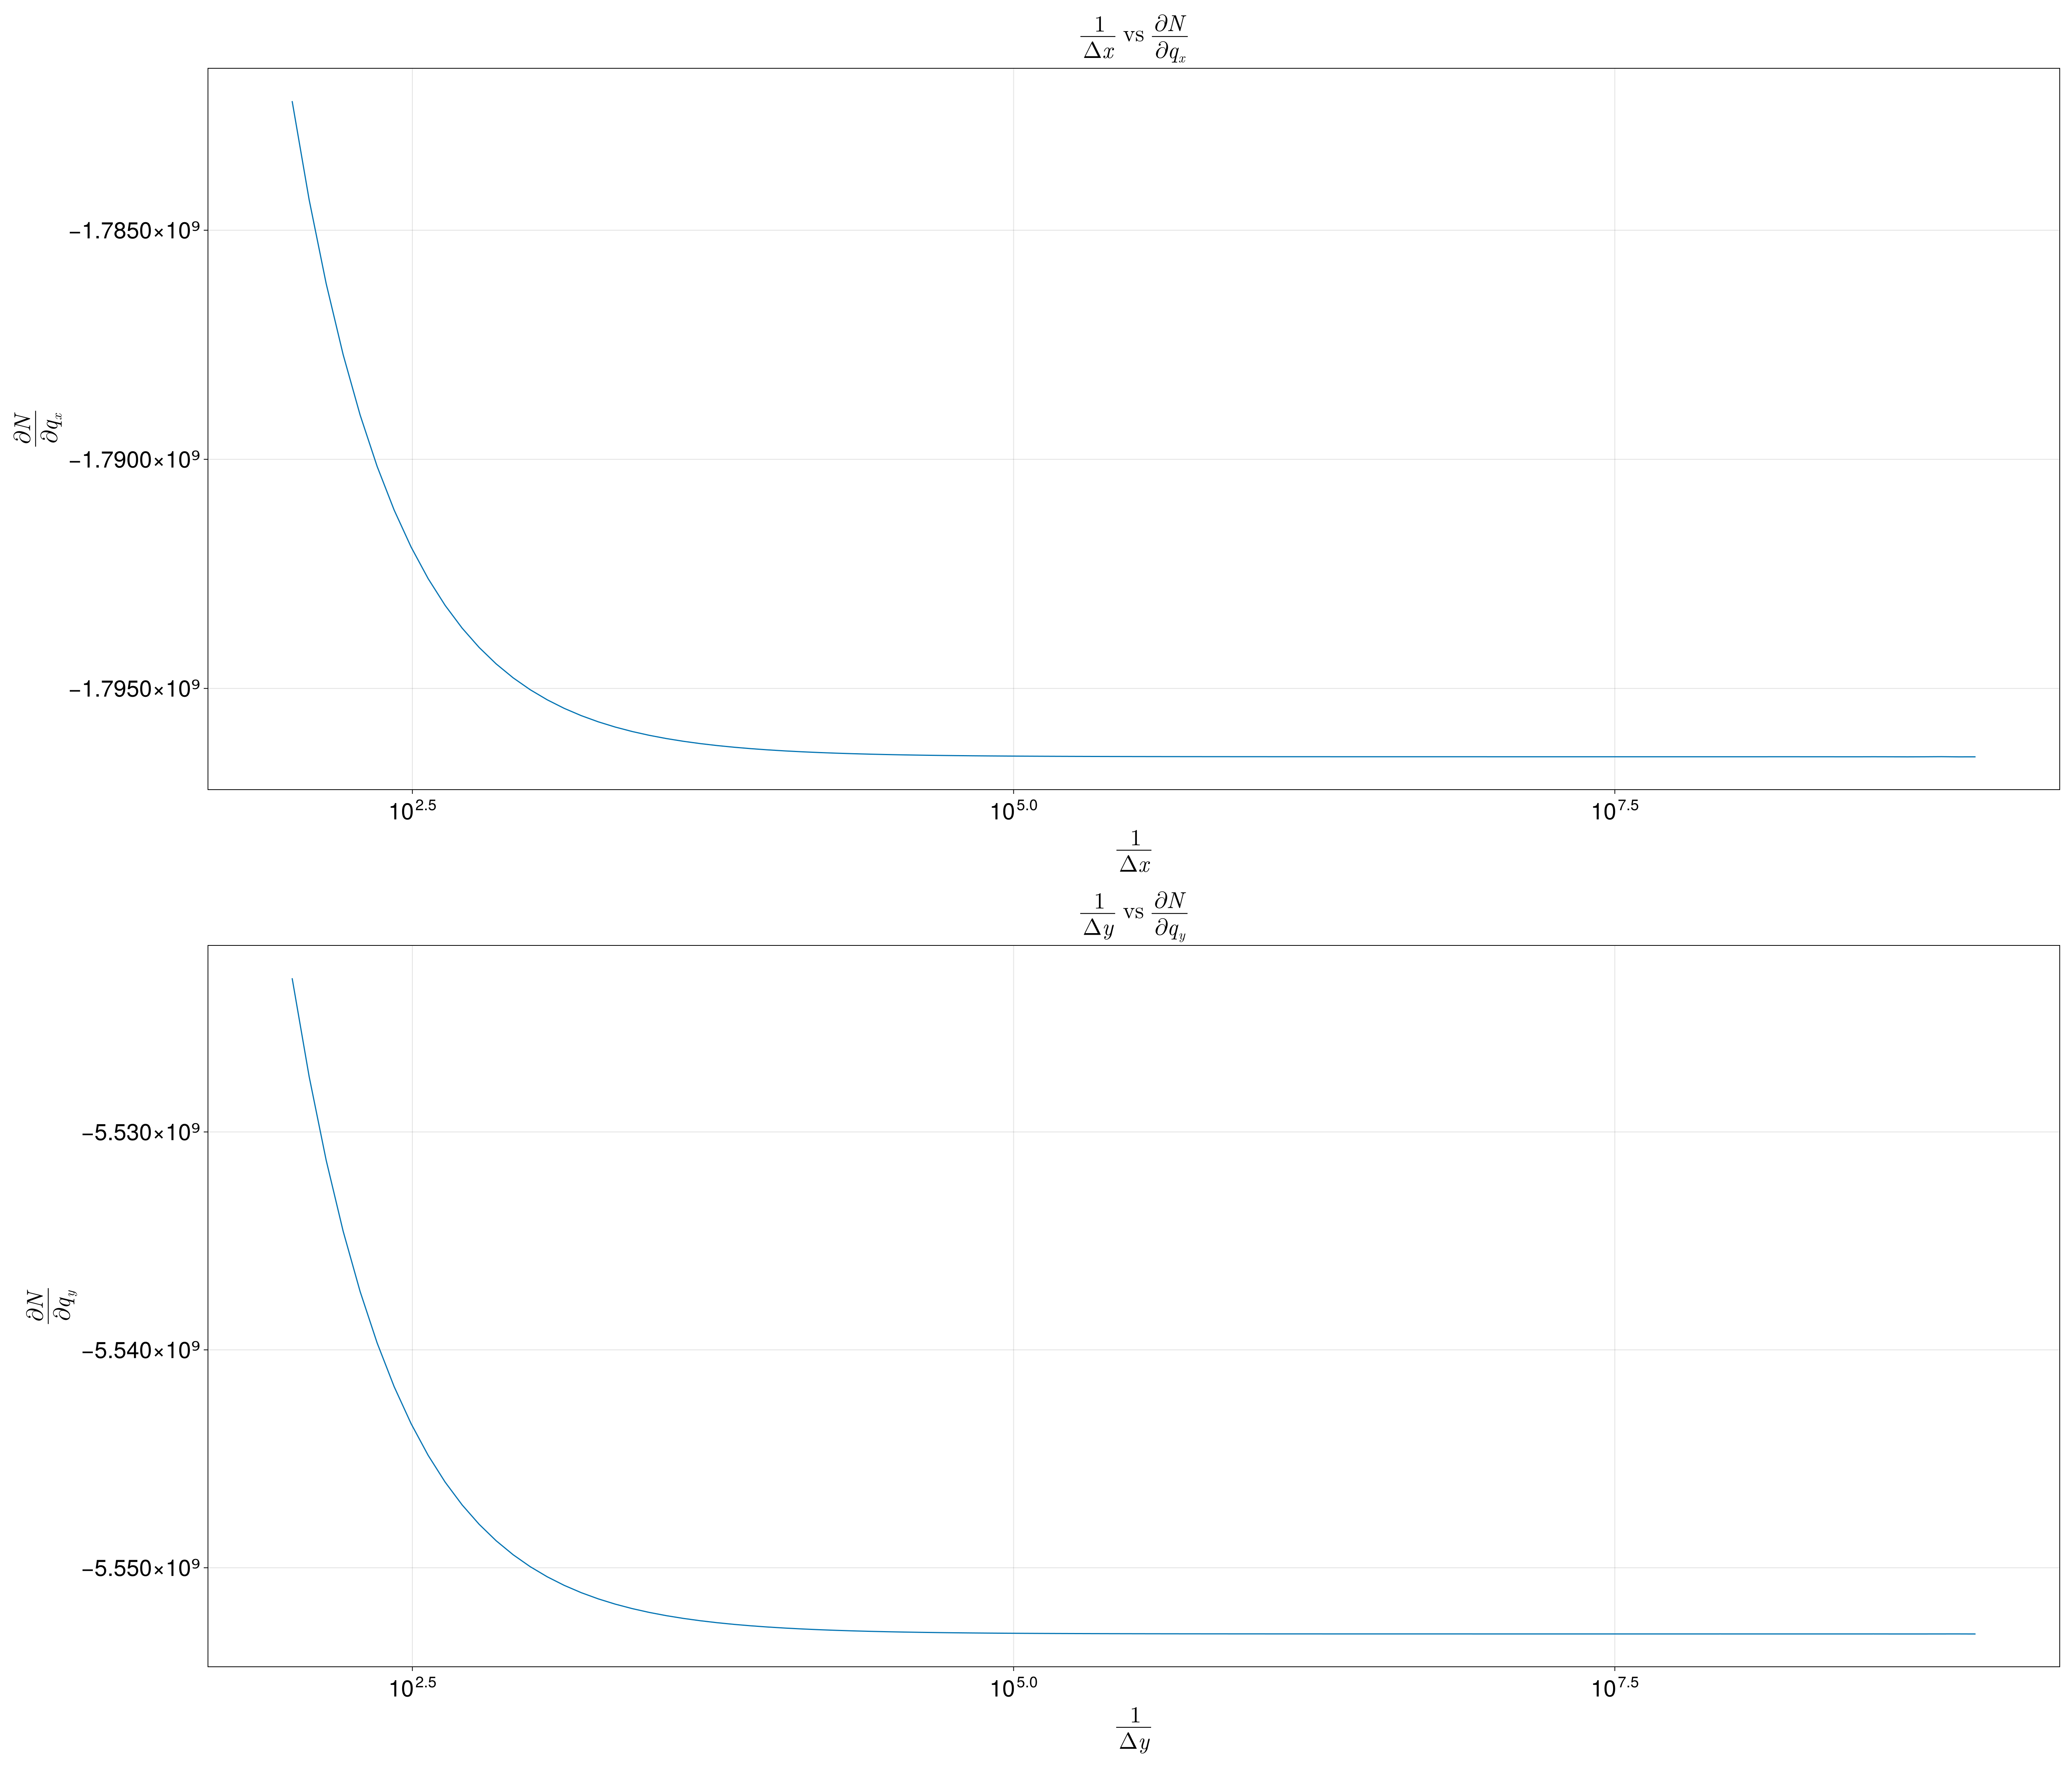

In [53]:
d_nmz_conv(delta, alpha, k, index, vF)

In [12]:
function A1_comp(delta, alpha, k, index, vF)
    x, y = k
    epsilon = vF_analytic_eigenvalues(alpha, delta, k[1], k[2], vF)[index]
    # convenience
    v = vF
    omega = exp(im * 2 * pi/ 3)
    q = k[1] + im * k[2]
    # variables
    f1 = delta + alpha * (q + conj(q))
    v1 = v * (q + conj(q))
    f3 = delta + alpha * (omega * q + conj(omega * q))
    v3 = v * (omega * q + conj(omega * q))
    f5 = delta + alpha * (conj(omega) * q + omega * conj(q))
    v5 = v * (conj(omega) * q + omega * conj(q))
    # normalization
    nmz = (((epsilon - v5) * (epsilon - v3) - abs2(f1))^2 + abs2(f1) * (abs2(f3) + abs2(f5)) + 
    2 * real(f1 * f3 * f5) * (2 * epsilon - v3 - v5) + abs2(f3) * (epsilon - v3)^2 + abs2(f5) * (epsilon - v5)^2)
    # eigenvector entries
    A1 = (epsilon - v5) * (epsilon - v3) - abs2(f1)
    
    return A1 / sqrt(nmz)
end

A1_comp (generic function with 1 method)

In [13]:
function d_A1_conv(delta, alpha, k, index, vF)
    A1_0 = A1_comp(delta, alpha, k, index, vF)

    n_pts = 10^2
    log_dx_list = range(2, 9, n_pts)
    dx_list = 10 .^log_dx_list
    log_dy_list = range(2, 9, n_pts)
    dy_list = 10 .^log_dy_list
    nmz_list = Array{Float64}(undef, n_pts, 2)

    for j in 1:n_pts
        dx = 1/dx_list[j]
        nmz_list[j, 1] = (A1_comp(delta, alpha, k .+ [dx, 0], index, vF) - A1_0) / dx

        dy = 1/dy_list[j]
        nmz_list[j, 2] = (A1_comp(delta, alpha, k .+ [0, dy], index, vF) - A1_0) / dy

    end
    P = Figure(size=(2700, 2300), fontsize=30)
    ax1 = Axis(P[1, 1], title = L"\frac{1}{\Delta x} \text{ vs } \frac{\partial A_1}{\partial q_x}", xlabel = L"\frac{1}{\Delta x}", 
    ylabel = L"\frac{\partial A_1}{\partial q_x}", xscale = log10)
    lines!(ax1, dx_list, nmz_list[:, 1])
    ax2 = Axis(P[2, 1], title = L"\frac{1}{\Delta y} \text{ vs } \frac{\partial A_1}{\partial q_y}", xlabel = L"\frac{1}{\Delta y}", 
    ylabel = L"\frac{\partial A_1}{\partial q_y}", xscale = log10)
    lines!(ax2, dy_list, nmz_list[:, 2])
    P
end

d_A1_conv (generic function with 1 method)

In [13]:
d_A1_conv(delta, alpha, k, index, vF)

UndefVarError: UndefVarError: `delta` not defined

In [14]:
function A3_comp(delta, alpha, k, index, vF)
    x, y = k
    epsilon = vF_analytic_eigenvalues(alpha, delta, k[1], k[2], vF)[index]
    # convenience
    v = vF
    omega = exp(im * 2 * pi/ 3)
    q = k[1] + im * k[2]
    # variables
    f1 = delta + alpha * (q + conj(q))
    v1 = v * (q + conj(q))
    f3 = delta + alpha * (omega * q + conj(omega * q))
    v3 = v * (omega * q + conj(omega * q))
    f5 = delta + alpha * (conj(omega) * q + omega * conj(q))
    v5 = v * (conj(omega) * q + omega * conj(q))
    # normalization
    nmz = (((epsilon - v5) * (epsilon - v3) - abs2(f1))^2 + abs2(f1) * (abs2(f3) + abs2(f5)) + 
    2 * real(f1 * f3 * f5) * (2 * epsilon - v3 - v5) + abs2(f3) * (epsilon - v3)^2 + abs2(f5) * (epsilon - v5)^2)
    # eigenvector entries
    A3 = conj(f3) * (epsilon - v3) + f1 * f5
    
    return A3 / sqrt(nmz)
end

A3_comp (generic function with 1 method)

In [15]:
function d_A3_conv(delta, alpha, k, index, vF)
    A3_0 = A3_comp(delta, alpha, k, index, vF)

    n_pts = 10^2
    log_dx_list = range(2, 9, n_pts)
    dx_list = 10 .^log_dx_list
    log_dy_list = range(2, 9, n_pts)
    dy_list = 10 .^log_dy_list
    nmz_list = Array{Float64}(undef, n_pts, 2)

    for j in 1:n_pts
        dx = 1/dx_list[j]
        nmz_list[j, 1] = real.((A3_comp(delta, alpha, k .+ [dx, 0], index, vF) - A3_0) / dx)

        dy = 1/dy_list[j]
        nmz_list[j, 2] = real.((A3_comp(delta, alpha, k .+ [0, dy], index, vF) - A3_0) / dy)
    end
    P = Figure(size=(2700, 2300), fontsize=30)
    ax1 = Axis(P[1, 1], title = L"\frac{1}{\Delta x} \text{ vs } \frac{\partial A_3}{\partial q_x}", xlabel = L"\frac{1}{\Delta x}", 
    ylabel = L"\frac{\partial A_3}{\partial q_x}", xscale = log10)
    lines!(ax1, dx_list, nmz_list[:, 1])
    ax2 = Axis(P[2, 1], title = L"\frac{1}{\Delta y} \text{ vs } \frac{\partial A_3}{\partial q_y}", xlabel = L"\frac{1}{\Delta y}", 
    ylabel = L"\frac{\partial A_3}{\partial q_y}", xscale = log10)
    lines!(ax2, dy_list, nmz_list[:, 2])
    P
end

d_A3_conv (generic function with 1 method)

In [16]:
d_A3_conv(delta, alpha, k, index, vF)

UndefVarError: UndefVarError: `delta` not defined

In [16]:
function A5_comp(delta, alpha, k, index, vF)
    x, y = k
    epsilon = vF_analytic_eigenvalues(alpha, delta, k[1], k[2], vF)[index]
    # convenience
    v = vF
    omega = exp(im * 2 * pi/ 3)
    q = k[1] + im * k[2]
    # variables
    f1 = delta + alpha * (q + conj(q))
    v1 = v * (q + conj(q))
    f3 = delta + alpha * (omega * q + conj(omega * q))
    v3 = v * (omega * q + conj(omega * q))
    f5 = delta + alpha * (conj(omega) * q + omega * conj(q))
    v5 = v * (conj(omega) * q + omega * conj(q))
    # normalization
    nmz = (((epsilon - v5) * (epsilon - v3) - abs2(f1))^2 + abs2(f1) * (abs2(f3) + abs2(f5)) + 
    2 * real(f1 * f3 * f5) * (2 * epsilon - v3 - v5) + abs2(f3) * (epsilon - v3)^2 + abs2(f5) * (epsilon - v5)^2)
    # eigenvector entries
    A5 = f5 * (epsilon - v5) + conj(f1) * conj(f3)
    
    return A5 / sqrt(nmz)
end

A5_comp (generic function with 1 method)

In [17]:
function d_A5_conv(delta, alpha, k, index, vF)
    A5_0 = A5_comp(delta, alpha, k, index, vF)

    n_pts = 10^2
    log_dx_list = range(2, 9, n_pts)
    dx_list = 10 .^log_dx_list
    log_dy_list = range(2, 9, n_pts)
    dy_list = 10 .^log_dy_list
    nmz_list = Array{Float64}(undef, n_pts, 2)

    for j in 1:n_pts
        dx = 1/dx_list[j]
        nmz_list[j, 1] = imag.((A5_comp(delta, alpha, k .+ [dx, 0], index, vF) - A5_0) / dx)

        dy = 1/dy_list[j]
        nmz_list[j, 2] = imag.((A5_comp(delta, alpha, k .+ [0, dy], index, vF) - A5_0) / dy)
    end
    P = Figure(size=(2700, 2300), fontsize=30)
    ax1 = Axis(P[1, 1], title = L"\frac{1}{\Delta x} \text{ vs } \frac{\partial A_5}{\partial q_x}", xlabel = L"\frac{1}{\Delta x}", 
    ylabel = L"\frac{\partial A_5}{\partial q_x}", xscale = log10)
    lines!(ax1, dx_list, nmz_list[:, 1])
    ax2 = Axis(P[2, 1], title = L"\frac{1}{\Delta y} \text{ vs } \frac{\partial A_5}{\partial q_y}", xlabel = L"\frac{1}{\Delta y}", 
    ylabel = L"\frac{\partial A_5}{\partial q_y}", xscale = log10)
    lines!(ax2, dy_list, nmz_list[:, 2])
    P
end

d_A5_conv (generic function with 1 method)

In [19]:
d_A5_conv(delta, alpha, k, index, vF)

UndefVarError: UndefVarError: `delta` not defined

The resounding consensus appears to be that $\Delta q_\mu = 10^{-6}$ is sufficient for convergence of derivatives.

In [18]:
function d_A1(delta, alpha, k, index, vF, dmu)
    A1_0 = A1_comp(delta, alpha, k, index, vF)
    A1_x = A1_comp(delta, alpha, k .+ [dmu, 0], index, vF)
    A1_y = A1_comp(delta, alpha, k .+ [0, dmu], index, vF)
    dx_A1 = (A1_x - A1_0)/dmu
    dy_A1 = (A1_y - A1_0)/dmu

    return [dx_A1, dy_A1]
end

d_A1 (generic function with 1 method)

In [19]:
function d_A3(delta, alpha, k, index, vF, dmu)
    A3_0 = A3_comp(delta, alpha, k, index, vF)
    A3_x = A3_comp(delta, alpha, k .+ [dmu, 0], index, vF)
    A3_y = A3_comp(delta, alpha, k .+ [0, dmu], index, vF)
    dx_A3 = (A3_x - A3_0)/dmu
    dy_A3 = (A3_y - A3_0)/dmu

    return [dx_A3, dy_A3]
end

d_A3 (generic function with 1 method)

In [20]:
function d_A5(delta, alpha, k, index, vF, dmu)
    A5_0 = A5_comp(delta, alpha, k, index, vF)
    A5_x = A5_comp(delta, alpha, k .+ [dmu, 0], index, vF)
    A5_y = A5_comp(delta, alpha, k .+ [0, dmu], index, vF)
    dx_A5 = (A5_x - A5_0)/dmu
    dy_A5 = (A5_y - A5_0)/dmu

    return [dx_A5, dy_A5]
end

d_A5 (generic function with 1 method)

In [21]:
function berry_connect(delta, alpha, k, index, vF, dmu)
    # energies = vF_analytic_eigenvalues(alpha, delta, k[1], k[2], vF)
    # index = argmin(energies)
    
    A1_0 = A1_comp(delta, alpha, k, index, vF)
    A3_0 = A3_comp(delta, alpha, k, index, vF)
    A5_0 = A5_comp(delta, alpha, k, index, vF)

    grad_A1 = d_A1(delta, alpha, k, index, vF, dmu)
    grad_A3 = d_A3(delta, alpha, k, index, vF, dmu)
    grad_A5 = d_A5(delta, alpha, k, index, vF, dmu)

    return im * (conj(A1_0) * grad_A1 + conj(A3_0) * grad_A3 + conj(A5_0) * grad_A5)
end 

berry_connect (generic function with 1 method)

### Integration of Berry connection over a disk

In [22]:
# nice functions to have
function integrate_disk(f, R)
    theta_integral = quadgk(theta -> begin
        r_integral = quadgk(r -> f(r * cos(theta), r * sin(theta)) * r, 0, R)[1]
        return r_integral
    end, 0, 2*pi)[1]

    return theta_integral
end

function loop_integral(f, R)
    integral, _ = quadgk(theta -> f(R * cos(theta), R * sin(theta)), 0, 2 * pi)
    return integral
end

function vector_loop_integral(A, R)
    integrand(theta) = begin
        x, y = R*cos(theta), R*sin(theta)
        Ax, Ay = A(x, y)
        dx_dtheta, dy_dtheta = -R*sin(theta), R*cos(theta)
        dot = real(Ax * dx_dtheta + Ay * dy_dtheta)
        return isnan(dot) || isinf(dot) ? 0.0 : clamp(dot, -1e20, 1e20) 
    end
    integral, _ = quadgk(integrand, 0, 2*pi)
    return integral
end

vector_loop_integral (generic function with 1 method)

In [23]:
function integrate_connection(delta, alpha, vF, index, R)
    dmu = 10^(-7)
    A(x, y) = berry_connect(delta, alpha/2, [x, y], index, vF/2, dmu)
    result = vector_loop_integral(A, R)
    return result
end

integrate_connection (generic function with 1 method)

In [20]:
alpha = exp(im * 3*pi/5)
delta = exp(im * pi/3)
vF = 1/2 * abs(alpha) + 1/2 * abs(alpha) * abs(cos(3/2 * wrap_angle(angle(alpha))))
R = 10^(3)
index = 1

1

In [945]:
display(1/(2*pi) * integrate_connection(delta, alpha, vF, index, R))
display(1/(2*pi) * disc_int_connection(delta, alpha, vF, index, n_V, R))

0.5001009430637497

-0.49989902451350593

In [24]:
function int_berry_connection_conv(delta, alpha, vF, index)
    n_pts = 10^2
    log_R_list = range(-2, 0, n_pts)
    bc_list = Array{Float64}(undef, n_pts)

    for j in 1:n_pts
        R = 10^log_R_list[j]
        bc_list[j] = integrate_connection(delta, alpha, vF, index, R)
    end
    P = Figure()
    ax1 = Axis(P[1, 1], title = L"\oiint \tilde{\Omega} dA \text{ vs } \text{log}(R)", xlabel = L"\text{log}(R)", 
    ylabel = L"\oiint \tilde{\Omega} dA ")
    lines!(ax1, log_R_list, bc_list)
    P
end

int_berry_connection_conv (generic function with 1 method)

In [257]:
delta = exp(im * 2*pi/3 * 0)
alpha = exp(im * 3*pi/7)
vF = 1
index = 1

1

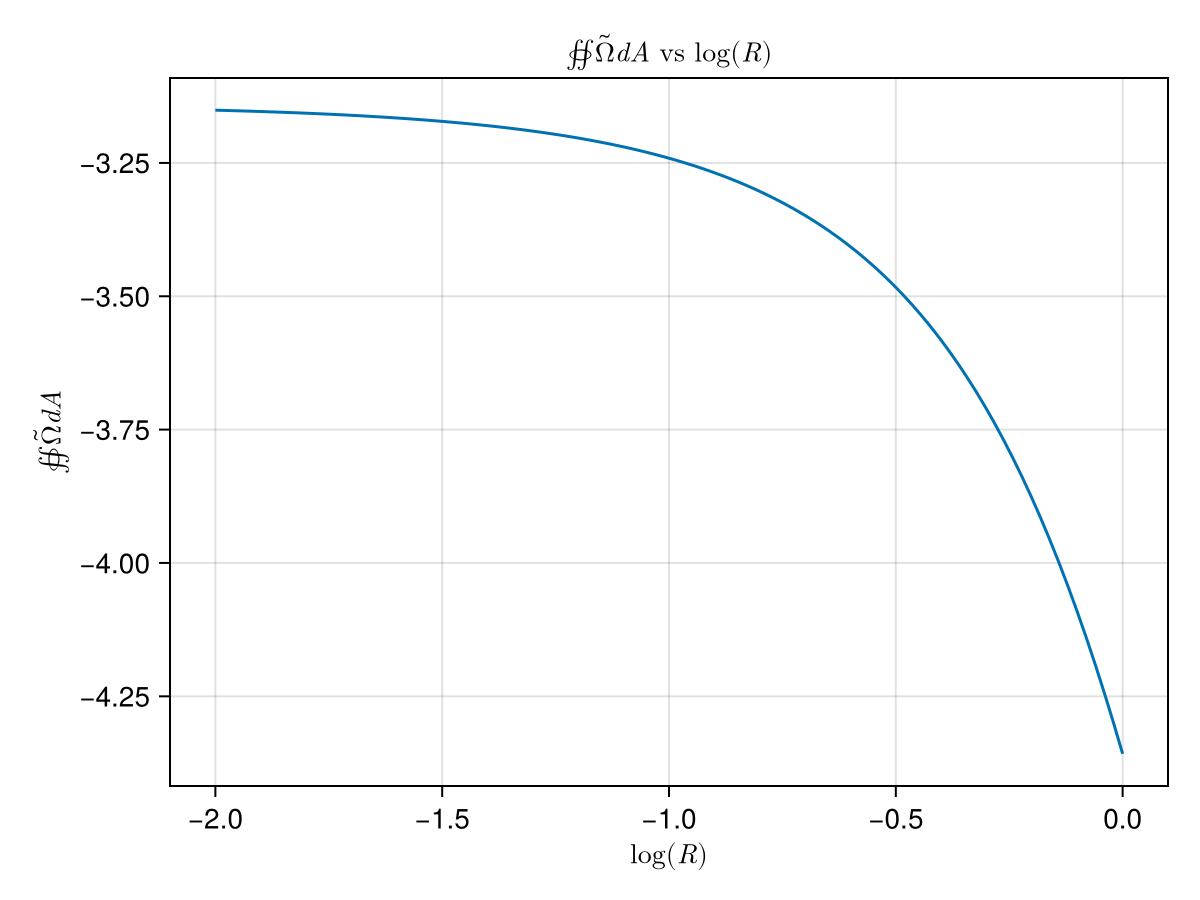

In [258]:
int_berry_connection_conv(delta, alpha, vF, index)

- $R = 10^{-2}$ seems good for detecting topological charge of monopole at the origin

## Some experiments on this Berry curvature

### Recover the monopoles??

In [1023]:
alpha = 1/3 * exp(im * pi/11)
delta = conj(omega)
vF = 1/2 * abs(alpha) + 1/2 * abs(alpha) * abs(cos(3/2 * angle(alpha)))
R = 10^(-2)
dmu = 10^(-7)

1.0e-7

In [321]:
delta_list = [-2*pi/3, -pi/3, 0, pi/3, 2*pi/3, pi]
monopole_list = Array{Float64}(undef, 3, length(delta_list))

3×6 Matrix{Float64}:
 6.57538e-314  6.57538e-314  6.57538e-314  …  6.57538e-314  6.57538e-314
 7.4e-323      1.1e-322      1.53e-322        2.47e-322     2.67e-322
 3.0e-323      4.0e-323      6.0e-323         1.5e-323      7.4e-323

In [322]:
for i in 1:3
    index = i
    for j in 1:length(delta_list)
        delta = exp(im * delta_list[j])
        monopole_list[i, j] = 1/(2*pi) * integrate_connection(delta, alpha, vF, index, R)
    end
end

In [320]:
print(monopole_list[1, :])

[5.238299359935189e-6, -0.14286306345711397, 1.4555752679392107e-6, -0.49817884061177864, -0.0005641268481324443, 0.0002846318736313424]

# Discrete Pancharatnam Approach

Tomo pointed out that the likely cause of my woes with the time elapsed during numerical integration is some kind of gauge issue with the Berry connection. If the gauge we've fixed is particularly funky, then the Gaussian quadrature might be taking a long time to integrate points that exhibit very strange behavior. Let's opt for a discrete Pancharatnam phase approach...

In [25]:
function disc_int_connection(delta, alpha, vF, index, n_V, R)
    """
    - index here is the energy index (ground, 1st excited, 2nd excited)
    - alpha = 2*alpha here
    - vF = 2*vF here
    - n_V is how many pts along the disk to use for the computation (use large n_V to get circle approximation)
    - R is the radius of the disk
    """
    states = Array{ComplexF64}(undef, n_V, 3)
    for j in 1:n_V
        qx = R * cos(2 * pi * (j - 1) / n_V)
        qy = R * sin(2 * pi * (j - 1) / n_V)

        A1_0 = A1_comp(delta, alpha/2, [qx, qy], index, vF/2)
        A3_0 = A3_comp(delta, alpha/2, [qx, qy], index, vF/2)
        A5_0 = A5_comp(delta, alpha/2, [qx, qy], index, vF/2)

        states[j, :] = [A1_0, A3_0, A5_0]
    end
    P = 1
    for j in 1:n_V
        if j < n_V
            temp = dot(states[j, :], states[j + 1, :])
            P *= temp
        else
            temp = dot(states[j, :], states[1, :])
            P *= temp
        end
        if temp != 0
            P /= abs(temp)
        end
    end
    # return -imag(P)
    if abs(imag(P)) < 10^(-16)
        return -angle(real(P))
    else
        return -angle(P)
    end
end

disc_int_connection (generic function with 1 method)

## Convergence with $n_V$ of Pancharatnam Method

In [26]:
function disc_int_conv_nV(delta, alpha, vF, index, R)
    nV_list = 1:10^3
    P_list = Array{Float64}(undef, length(nV_list))
    for j in 1:length(nV_list)
        n_V = nV_list[j]
        P_list[j] = disc_int_connection(delta, alpha, vF, index, n_V, R)
    end
    P = Figure()
    ax1 = Axis(P[1, 1], title = L"\oiint \tilde{\Omega} dA \text{ vs } n_V", xlabel = L"n_V", 
    ylabel = L"\oiint \tilde{\Omega} dA ")
    lines!(ax1, nV_list, P_list)
    P
end

disc_int_conv_nV (generic function with 1 method)

In [998]:
delta = 0
alpha = exp(im * pi/9)
vF = 1/2 * abs(alpha) + 1/2 * abs(alpha) * abs(cos(3/2 * angle(alpha)))
index = 1
R = 0.001

0.001

In [999]:
disc_int_connection(delta, alpha, vF, index, n_V, R)

-3.129876538481092

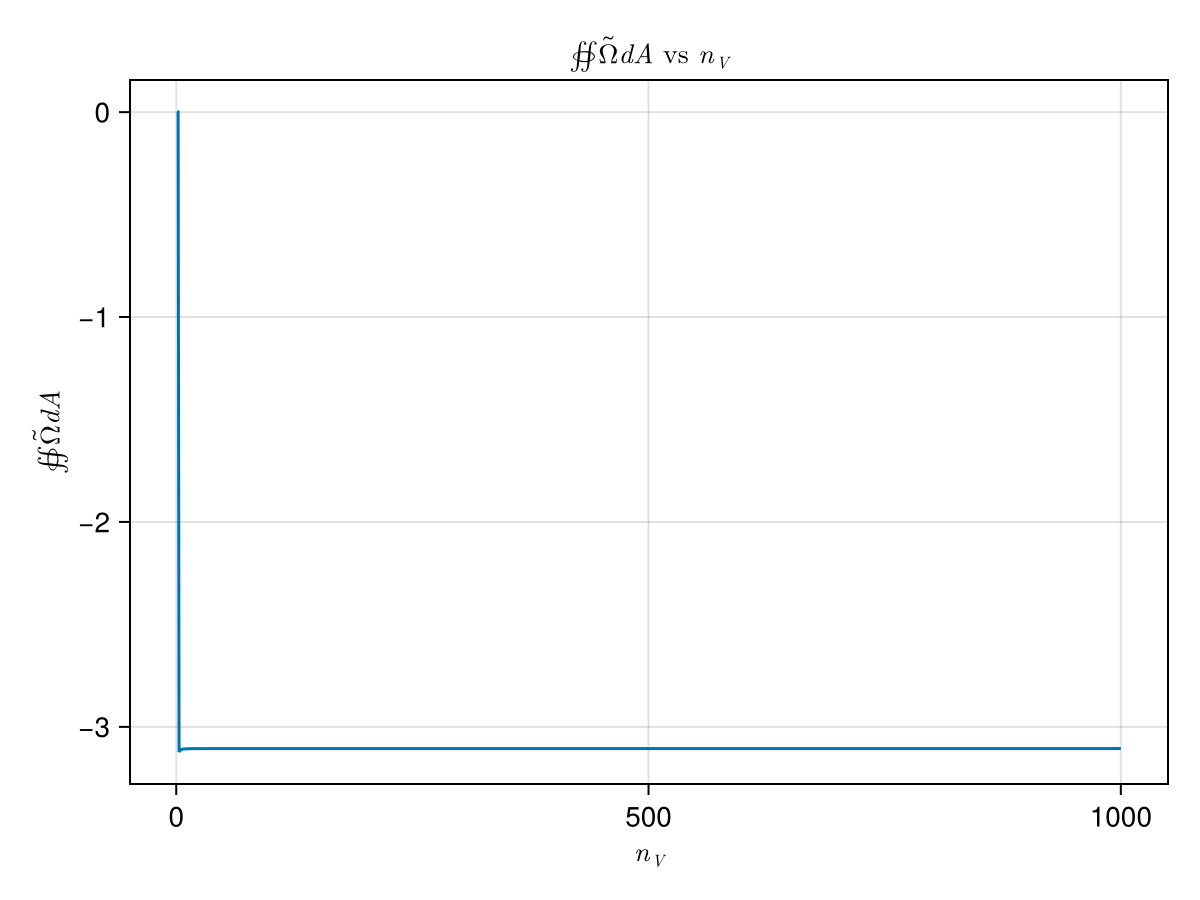

In [995]:
disc_int_conv_nV(delta, alpha, vF, index, R)

## Convergence with $R$ of Pancharatnam Method

In [27]:
function disc_int_conv_R(delta, alpha, vF, index, n_V)
    R_list = range(0, 10^6, 10^3)
    P_list = Array{Float64}(undef, length(R_list))
    for j in 1:length(R_list)
        R = R_list[j]
        P_list[j] = disc_int_connection(delta, alpha, vF, index, n_V, R)
    end
    P = Figure()
    ax1 = Axis(P[1, 1], title = L"\oiint \tilde{\Omega} dA \text{ vs } R", xlabel = L"R", 
    ylabel = L"\oiint \tilde{\Omega} dA ")
    lines!(ax1, R_list, P_list)
    P
end

disc_int_conv_R (generic function with 1 method)

In [991]:
delta = 0.0001
alpha = exp(im * pi/6)
vF = 1/2 * abs(alpha) + 1/2 * abs(alpha) * abs(cos(3/2 * angle(alpha)))
index = 1
n_V = 600

600

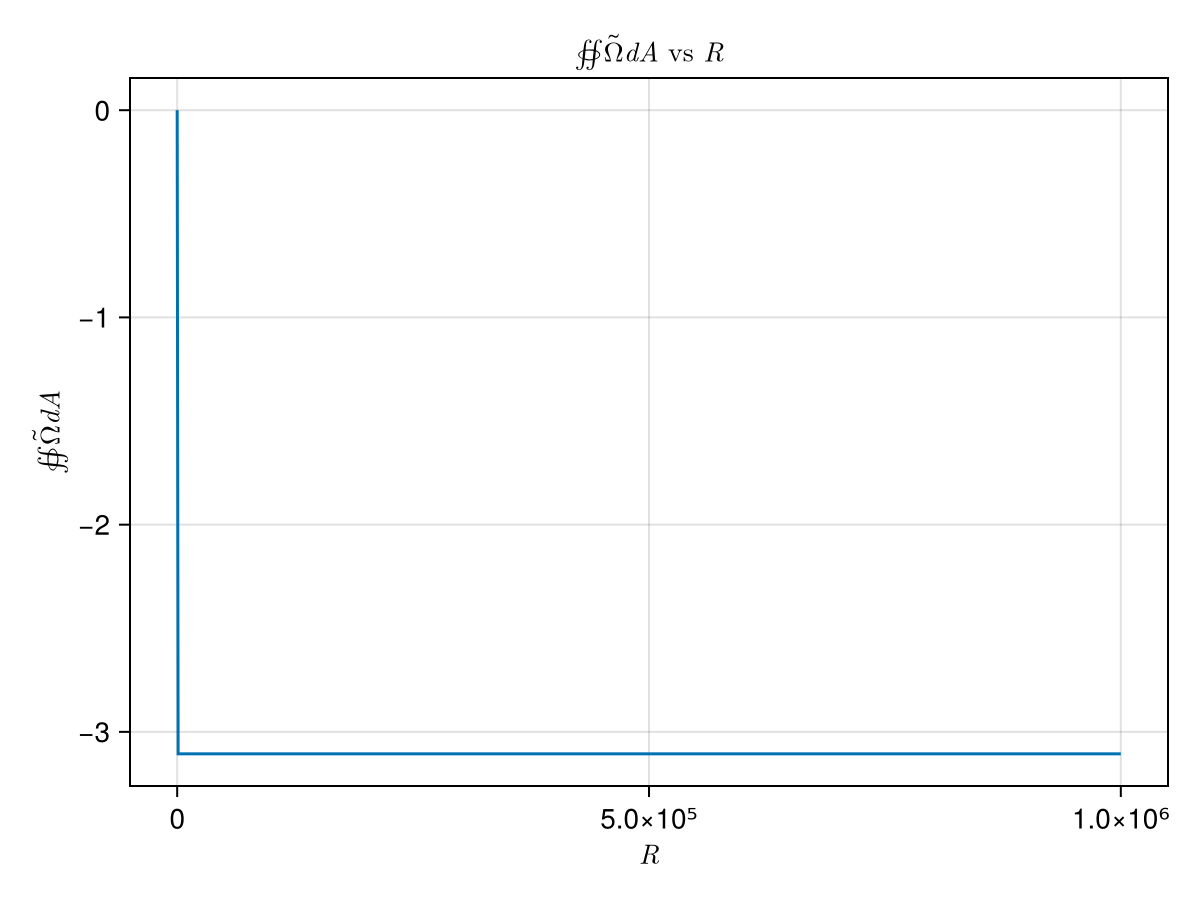

In [992]:
disc_int_conv_R(delta, alpha, vF, index, n_V)

We've now determined that $n_V = 600$ and $R = 10^6$ appear sufficient to capture the integrated Berry curvature across the entire $(q_x, q_y)$ plane.

# Pancharatnam Method Experiments

In [28]:
function int_bc_vF(delta, alpha, index, n_V, R)
    vF_list = range(0, 10, 10^3)
    vals = Array{Float64}(undef, length(vF_list))
    for j in 1:length(vF_list)
        vF = vF_list[j]
        vals[j] = disc_int_connection(delta, alpha, vF, index, n_V, R)
    end
    P = Figure()
    ax1 = Axis(P[1, 1], title = L"\oiint \tilde{\Omega} dA \text{ vs } v_F", xlabel = L"v_F", 
    ylabel = L"\oiint \tilde{\Omega} dA ")
    lines!(ax1, vF_list, vals)
    P
end

int_bc_vF (generic function with 1 method)

In [556]:
delta = exp(im * 2*pi/3 * 3)
alpha = exp(im * 5*pi/7)
index = 1
n_V = 600
R = 10^6

1000000

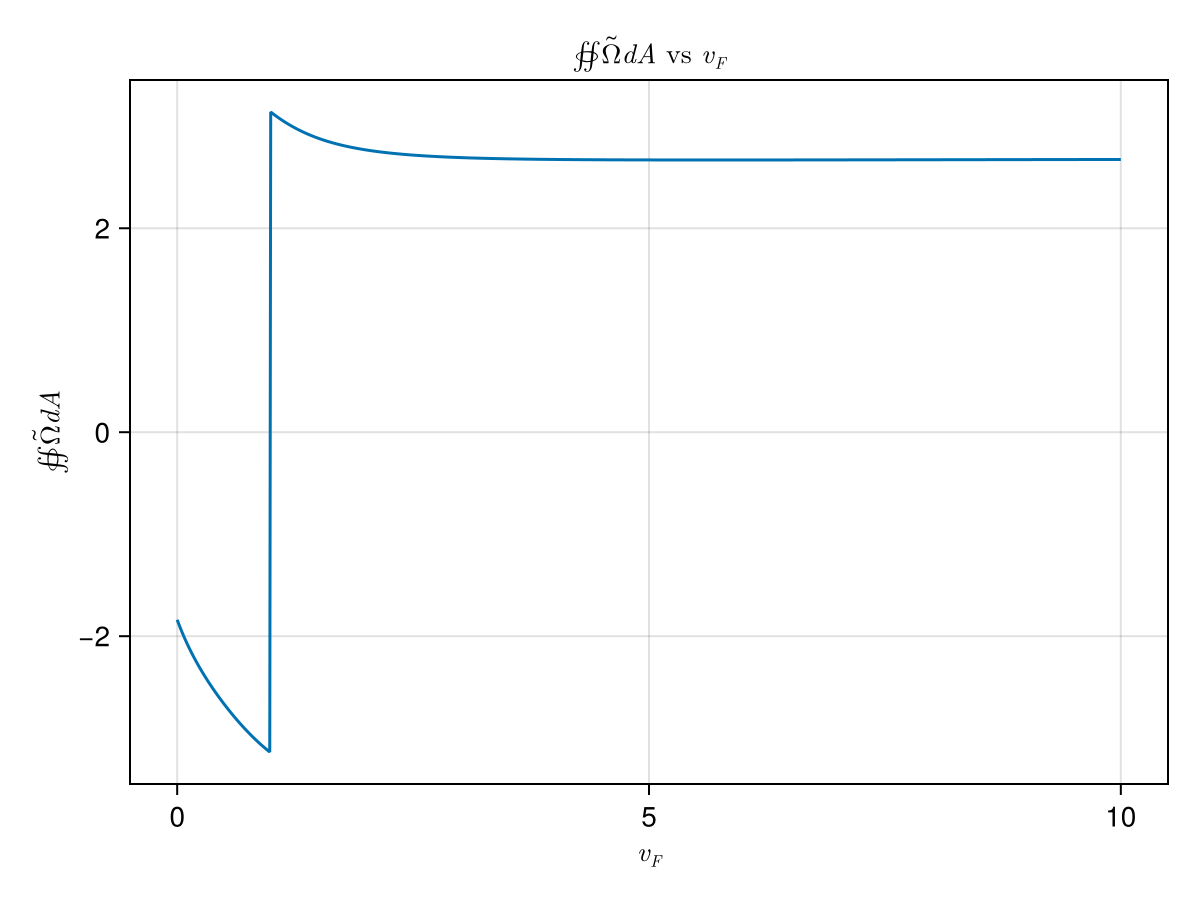

In [557]:
int_bc_vF(delta, alpha, index, n_V, R)

In [29]:
function int_bc_theta(delta, vF, index, n_V, R)
    angle_list = range(-pi, pi, 10^3)
    vals = Array{Float64}(undef, length(angle_list))
    for j in 1:length(angle_list)
        alpha = exp(im * angle_list[j])
        vals[j] = disc_int_connection(delta, alpha, vF, index, n_V, R)
    end
    P = Figure()
    ax1 = Axis(P[1, 1], title = L"\frac{1}{2 \pi} \oiint \tilde{\Omega} dA \text{ vs } \frac{1}{\pi}\arg(\alpha)", 
    xlabel = L"\frac{1}{\pi}\arg(\alpha)", 
    ylabel = L"\frac{1}{2 \pi} \oiint \tilde{\Omega} dA ")
    lines!(ax1, 1/pi * angle_list, 1/(2*pi) * vals)
    lines!(ax1, 1/pi * angle_list, 0.5 * ones(length(angle_list)))
    lines!(ax1, 1/pi * angle_list, -0.5 * ones(length(angle_list)))
    lines!(ax1, 1/6 * ones(length(angle_list)), 1/(2*pi) * vals)
    P
end

int_bc_theta (generic function with 1 method)

In [58]:
delta = exp(im * 2*pi/3 * 3)
vF = 0
index = 1
n_V = 600
R = 10^6

1000000

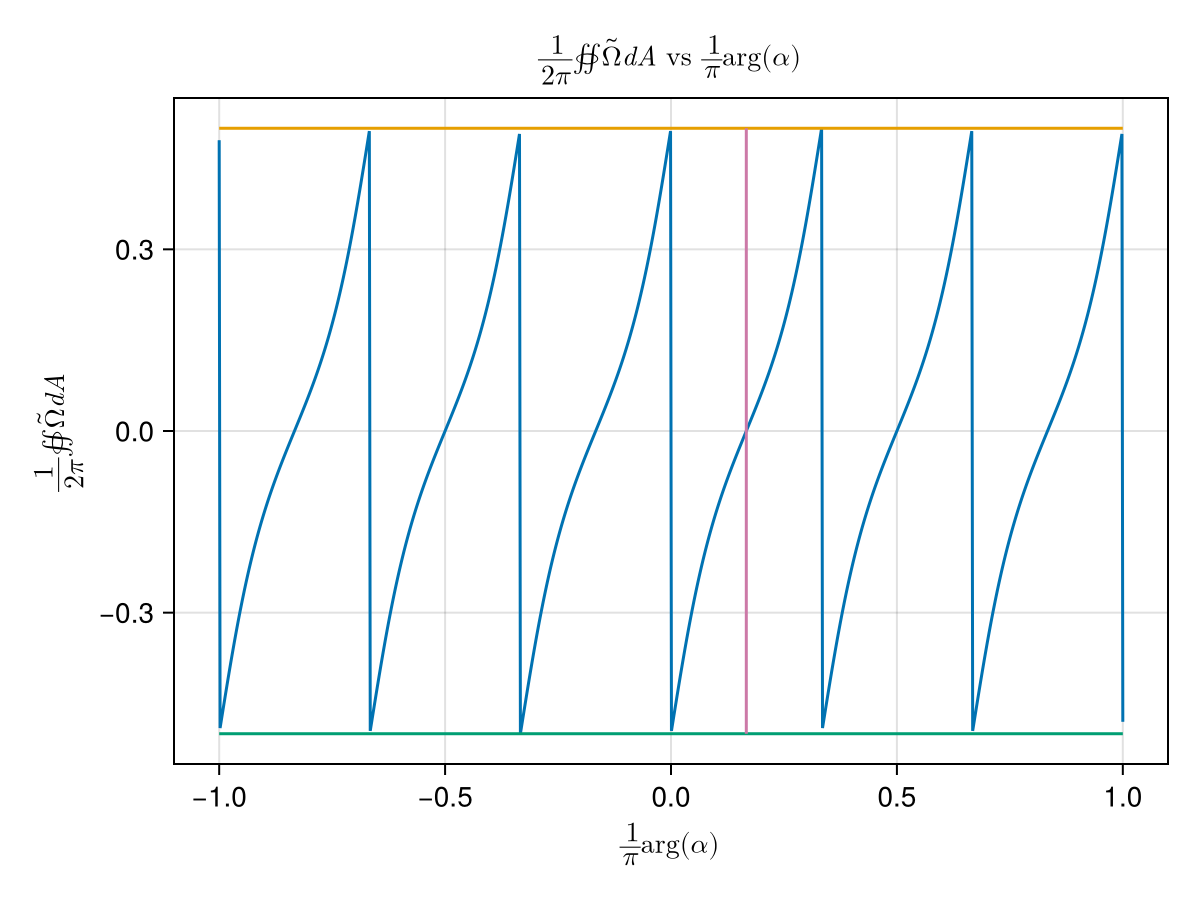

In [59]:
int_bc_theta(delta, vF, index, n_V, R)

In [5]:
grid = reshape([0.01, -0.04], (1, 2))
vF = 0
delta = 0
alpha = exp(im * (pi/6 + pi/11))
bc_no_spinors(grid, 10^(-3), vF, delta, alpha)

1-element Vector{Float64}:
 -0.00011406375184736592

In [7]:
grid = reshape([-0.01, 0.04], (1, 2))
vF = 0
delta = 0
alpha = exp(im * (pi/6 - pi/11))
bc_no_spinors(grid, 10^(-3), vF, delta, alpha)

1-element Vector{Float64}:
 0.00011406376207866238

## Contour Plot

In [30]:
function mesh_grid(list1, list2, type)
    l1 = length(list1)
    l2 = length(list2)
    grid = Array{type}(undef, l1 * l2, 2)
    for j in 1:l1
        grid[1 + (j-1)*l2:j*l2, 1] = ones(l2) * list1[j]
        grid[1 + (j-1)*l2:j*l2, 2] = list2
    end
    return grid
end

mesh_grid (generic function with 1 method)

In [31]:
function symm_curv(angles)
    exponent = 0.95 * ones(length(angles)) - (0.95 - 887350/999000) * abs.(cos.(3/2 * angles))
    base = abs.(cos.(3/2 * angles))
    return 1/2 * ones(length(angles)) .+ 1/2 * base.^exponent
end

symm_curv (generic function with 1 method)

In [68]:
function disc_int_bc(delta, index, n_V, R)
    angles = range(-0.99*pi, 0.99*pi, 10^3)
    vF_list = range(0, 0.5, 10^3)
    grid = mesh_grid(angles, vF_list, Float64)
    vals = Array{Float64}(undef, size(grid, 1))

    for j in 1:size(grid, 1)
        vF = grid[j, 2]
        alpha = exp(im * grid[j, 1])
        vals[j] = 1/(2*pi) * disc_int_connection(delta, alpha, vF, index, n_V, R)
        # vals[j] = bc_no_spinors(reshape([0.01, 0.01], (1, 2)), 10^(-3), vF, delta, alpha)[1]
    end

    fig = Figure(size=(1500, 1000), fontsize=30)
    ax1 = Axis(fig[1, 1], title = L"\frac{1}{2 \pi} \oiint \tilde{\Omega} dA \text{ vs } (\frac{1}{\pi} \arg[\alpha], \frac{v_F}{|\alpha|})", 
    ylabel = L"\frac{v_F}{|\alpha|}", xlabel = L"\frac{1}{\pi} \arg[\alpha]")

    ax1.xticks[] = ([-5/6, -4/6, -3/6, -2/6, -1/6, 0, 1/6, 2/6, 3/6, 4/6, 5/6], 
    [L"-5/6", L"-2/3", L"-1/2", L"-1/3", L"-1/6", L"0", L"1/6", L"1/3", L"1/2", L"2/3", L"5/6"])
    # ax1.xticks[] = ([-4/6, -2/6, 0, 2/6, 4/6], 
    # [L"-2/3", L"-1/3", L"0", L"1/3", L"2/3"])
    ax1.yticks[] = ([0, 1/2, 1], [L"0", L"1/2", L"1"])

    tr1 = contourf!(ax1, 1/pi * grid[:, 1], grid[:, 2], vals, colormap = :RdBu)

    # vertical symmetries
    # lines!(ax1, 0 * ones(length(grid[:, 1])), grid[:, 2], color = (:black, 0.5); linestyle = (:dash, :dense), linewidth = 7)
    # lines!(ax1, 1/3 * ones(length(grid[:, 1])), grid[:, 2], color = (:black, 0.5); linestyle = (:dash, :dense), linewidth = 7)
    # lines!(ax1, -1/3 * ones(length(grid[:, 1])), grid[:, 2], color = (:black, 0.5); linestyle = (:dash, :dense), linewidth = 7)
    # lines!(ax1, 2/3 * ones(length(grid[:, 1])), grid[:, 2], color = (:black, 0.5); linestyle = (:dash, :dense), linewidth = 7)
    # lines!(ax1, -2/3 * ones(length(grid[:, 1])), grid[:, 2], color = (:black, 0.5); linestyle = (:dash, :dense), linewidth = 7)


    #lines!(ax1, 1/pi * grid[:, 1], symm_curv(grid[:, 1]))
    # tr1 = tricontourf!(ax1, grid[:, 1], grid[:, 2], vals, colormap = :RdBu)
    cb1 = Colorbar(fig[1, 2], tr1)
    fig
end

disc_int_bc (generic function with 1 method)

In [69]:
delta = exp(im * pi/7)
index = 1
n_V = 600
R = 10^6

1000000

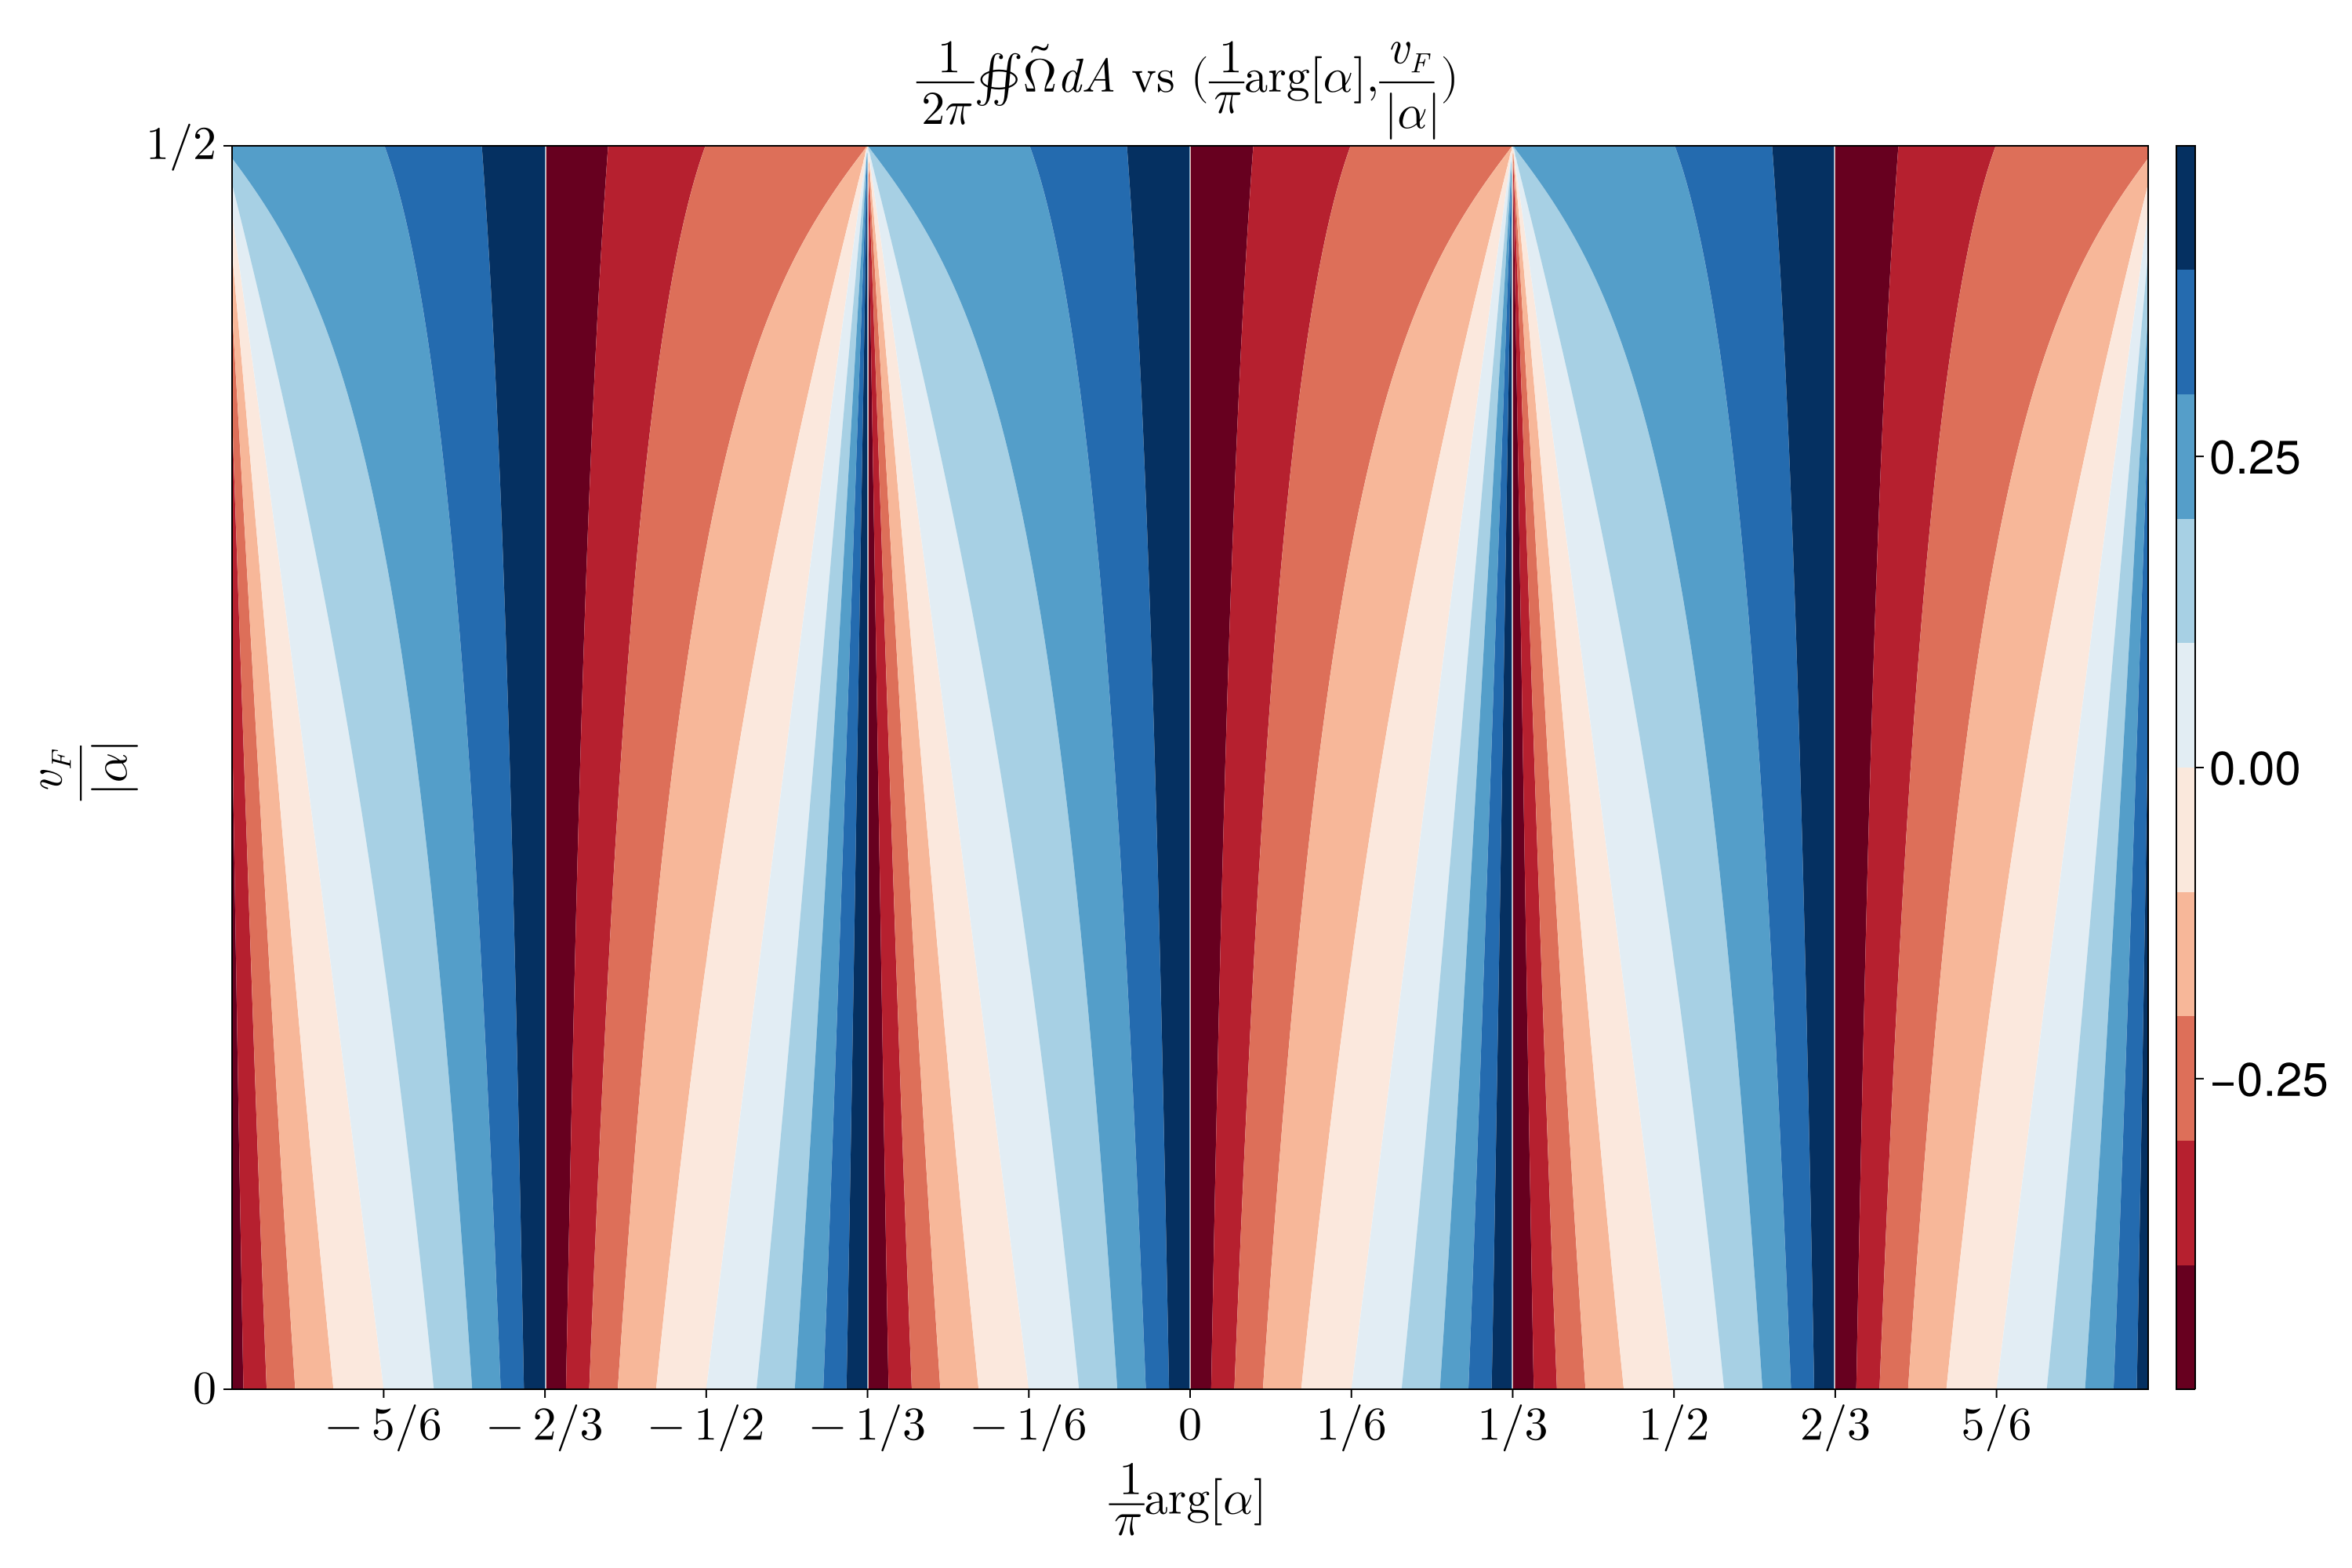

In [70]:
disc_int_bc(delta, index, n_V, R)

# A bit of fitting

In [30]:
function some_fitting(delta, index, n_V, R)
    angles = range(-0.99*pi, 0.99*pi, 10^2)
    d_list = range(0.8, 1, 10^2)
    grid = mesh_grid(angles, d_list, Float64)
    vals = Array{Float64}(undef, size(grid, 1))
    for j in 1:size(grid, 1)
        alpha = exp(im * grid[j, 1])
        vF = 1/2 * abs(alpha) + 1/2 * abs(alpha) * abs(cos(3/2 * angle(alpha)))^grid[j, 2]
        vals[j] = abs(1/(2*pi) * disc_int_connection(delta, alpha, vF, index, n_V, R))
    end
    # fig = Figure(size=(1500, 1000), fontsize=30)
    # ax1 = Axis(fig[1, 1], ylabel = L"\frac{1}{2 \pi} \oiint \tilde{\Omega} dA", xlabel = L"d")
    # scatter!(ax1, d_list, vals)
    # fig
    fig = Figure(size=(1500, 1000), fontsize=30)
    ax1 = Axis(fig[1, 1], 
    ylabel = L"d", xlabel = L"\frac{1}{\pi} \arg[\alpha]")
    tr1 = contourf!(ax1, 1/pi * grid[:, 1], grid[:, 2], vals, colormap = :RdBu)
    cb1 = Colorbar(fig[1, 2], tr1)
    fig
end

some_fitting (generic function with 1 method)

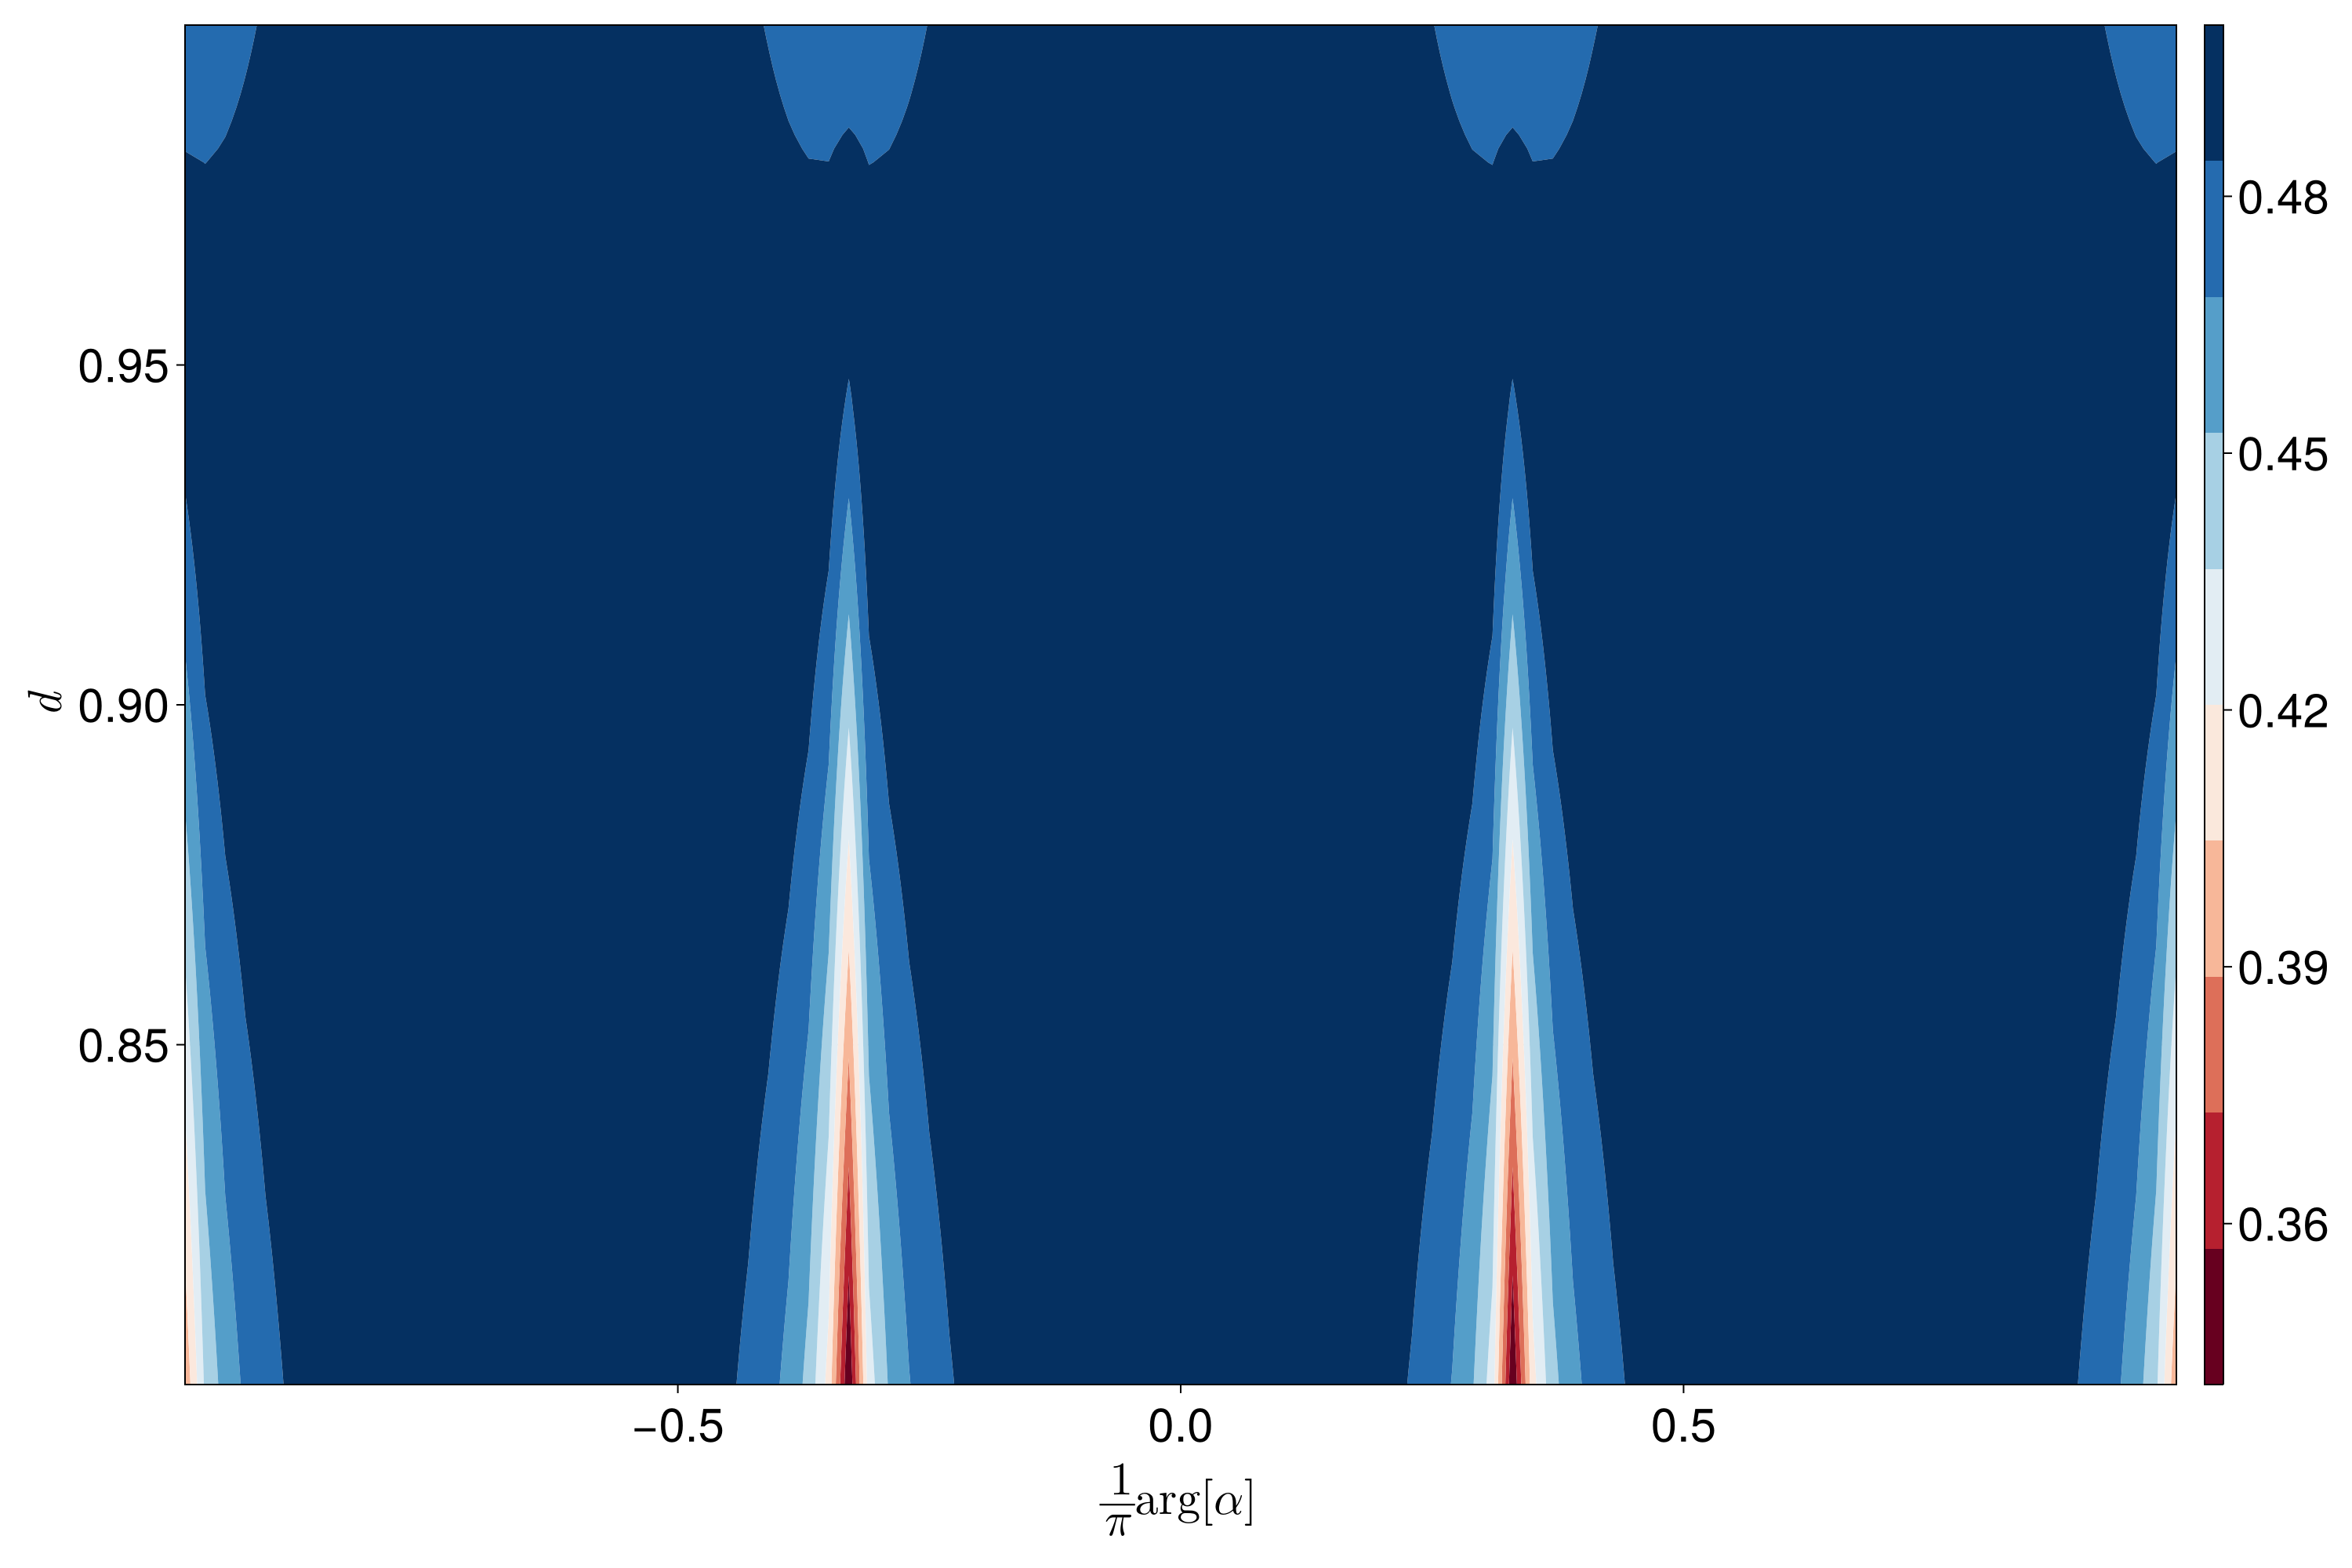

In [1526]:
delta = 0
index = 1
n_V = 600
R = 0.001
some_fitting(delta, index, n_V, R)

In [31]:
function f(delta, alpha, index, n_V, R, d_list)
    vals = Array{Float64}(undef, length(d_list))
    for j in 1:length(d_list)
        vF = 1/2 * abs(alpha) + 1/2 * abs(alpha) * abs(cos(3/2 * angle(alpha)))^d_list[j]
        vals[j] = abs(1/(2*pi) * disc_int_connection(delta, alpha, vF, index, n_V, R))
    end
    return vals
end
# some vals
delta = 0
index = 1
n_V = 600
R = 0.001
# Set up figure
fig = Figure()
d_list = range(0.85, 0.95, 10^3)
ax = Axis(fig[1, 1]; xlabel="d", ylabel="f")
plt = lines!(ax, d_list, f(delta, exp(-0.99*im*pi), index, n_V, R, d_list))  # Initial α = 1.0

angles = range(-0.99 * pi, 0.99 * pi, 10^2)

# Animate and save
record(fig, "f_vs_d_alpha_animation.mp4", angles) do angle
    alpha = exp(im * angle)
    y = f(delta, alpha, index, n_V, R, d_list)
    plt[1] = d_list  # update x
    plt[2] = y   # update y
end


InterruptException: InterruptException:

In [32]:
function some_fitting_p2(delta, alpha, index, n_V, R)
    d_list = range(0.85, 0.95, 10^3)
    vals = Array{Float64}(undef, length(d_list))
    for j in 1:length(d_list)
        vF = 1/2 * abs(alpha) + 1/2 * abs(alpha) * abs(cos(3/2 * angle(alpha)))^d_list[j]
        vals[j] = abs(1/(2*pi) * disc_int_connection(delta, alpha, vF, index, n_V, R))
    end
    fig = Figure(size=(1500, 1000), fontsize=30)
    ax1 = Axis(fig[1, 1], ylabel = L"\frac{1}{2 \pi} \oiint \tilde{\Omega} dA", xlabel = L"d")
    scatter!(ax1, d_list, vals)
    fig
end

some_fitting_p2 (generic function with 1 method)

In [ ]:
delta = 0
index = 1
n_V = 600
R = 0.001
some_fitting_p3(delta, exp(im*pi/2), index, n_V, R)

In [33]:
function some_fitting_p3(delta, index, n_V, R)
    angles = range(-0.99*pi, 0.99*pi, 10^3)
    d_list = range(0.85, 0.95, 10^3)
    vals = Array{Float64}(undef, length(angles))
    for j in 1:length(angles)
        alpha = exp(im * angles[j])
        temp_vals = Array{Float64}(undef, length(d_list))
        for i in 1:length(d_list)
            vF = 1/2 * abs(alpha) + 1/2 * abs(alpha) * abs(cos(3/2 * angle(alpha)))^d_list[i]
            temp_vals[i] = abs(1/(2*pi) * disc_int_connection(delta, alpha, vF, index, n_V, R))
        end
        vals[j] = d_list[argmax(temp_vals)]
    end
    fig = Figure(size=(1500, 1000), fontsize=30)
    ax1 = Axis(fig[1, 1], ylabel = L"d", xlabel = L"\frac{1}{\pi} \arg(\alpha)")
    scatter!(ax1, 1/pi * angles, vals)
    fig
    println(maximum(vals))
    println(minimum(vals))
end

some_fitting_p3 (generic function with 1 method)

In [1619]:
delta = 0
index = 1
n_V = 600
R = 0.001
some_fitting_p3(delta, index, n_V, R)

0.95
0.8888388388388389


# A line cut

In [34]:
function alpha_symmetry_cut(delta, index, n_V, R)
    angles = range(-0.99*pi, 0.99*pi, 10^3)
    vF_list = symm_curv(angles)
    vals = Array{Float64}(undef, length(angles))
    for j in 1:length(angles)
        vF = vF_list[j]
        alpha = exp(im * angles[j])
        vals[j] = 1/(2*pi) * disc_int_connection(delta, alpha, vF, index, n_V, R)
    end
    fig = Figure(size=(1500, 1000), fontsize=30)
    ax1 = Axis(fig[1, 1], ylabel = L"\frac{1}{2 \pi} \oiint \tilde{\Omega} dA", xlabel = L"\frac{1}{\pi} \arg(\alpha)")
    scatter!(ax1, 1/pi * angles, vals)
    fig
    #println(vals)
end

alpha_symmetry_cut (generic function with 1 method)

In [1646]:
delta = 0
index = 1
n_V = 600
R = 0.001
alpha_symmetry_cut(delta, index, n_V, R)

# Further Experiments

In [35]:
function disc_int_bc_line_cut(delta, index, n_V, R)
    angles = range(-0.99 * pi, 0.99*pi, 10^4)
    vals = Array{Float64}(undef, length(angles))
    vF_list = symm_curv(angles)
    for j in 1:length(angles)
        alpha = exp(im * angles[j])
        # vF = 1/2 * abs(alpha) + 1/2 * abs(alpha) * abs(cos(3/2 * angle(alpha)))
        vF = vF_list[j]
        vals[j] = 1/(2*pi) * disc_int_connection(delta, alpha, vF, index, n_V, R)
    end

    fig = Figure(size=(1500, 1000), fontsize=30)
    ax1 = Axis(fig[1, 1], title = L"\frac{1}{2 \pi} \oiint \tilde{\Omega} dA \text{ vs } \frac{1}{\pi} \arg[\alpha]", 
    ylabel = L"\frac{1}{2 \pi} \oiint \tilde{\Omega} dA", xlabel = L"\frac{1}{\pi} \arg[\alpha]")
    scatter!(ax1, 1/pi * angles, vals)
    fig
end

disc_int_bc_line_cut (generic function with 1 method)

In [1617]:
delta = 0
index = 1
n_V = 600
R = 10^(5)
disc_int_bc_line_cut(delta, index, n_V, R)

In [1427]:
function a1_comp_test(alpha, vF)
    delta = 0
    angles = range(-pi, pi, 10^4)
    vals = Array{Float64}(undef, length(angles))
    for j in 1:length(angles)
        vals[j] = 3*real(A1_comp(0, alpha/2, [cos(angles[j]), sin(angles[j])], 1, vF/2))
    end
    P = Figure()
    ax1 = Axis(P[1, 1], xlabel = L"\psi", 
    ylabel = L"3*A_1 ")
    scatter!(ax1, 1/pi * angles, vals)
    P
end

a1_comp_test (generic function with 1 method)

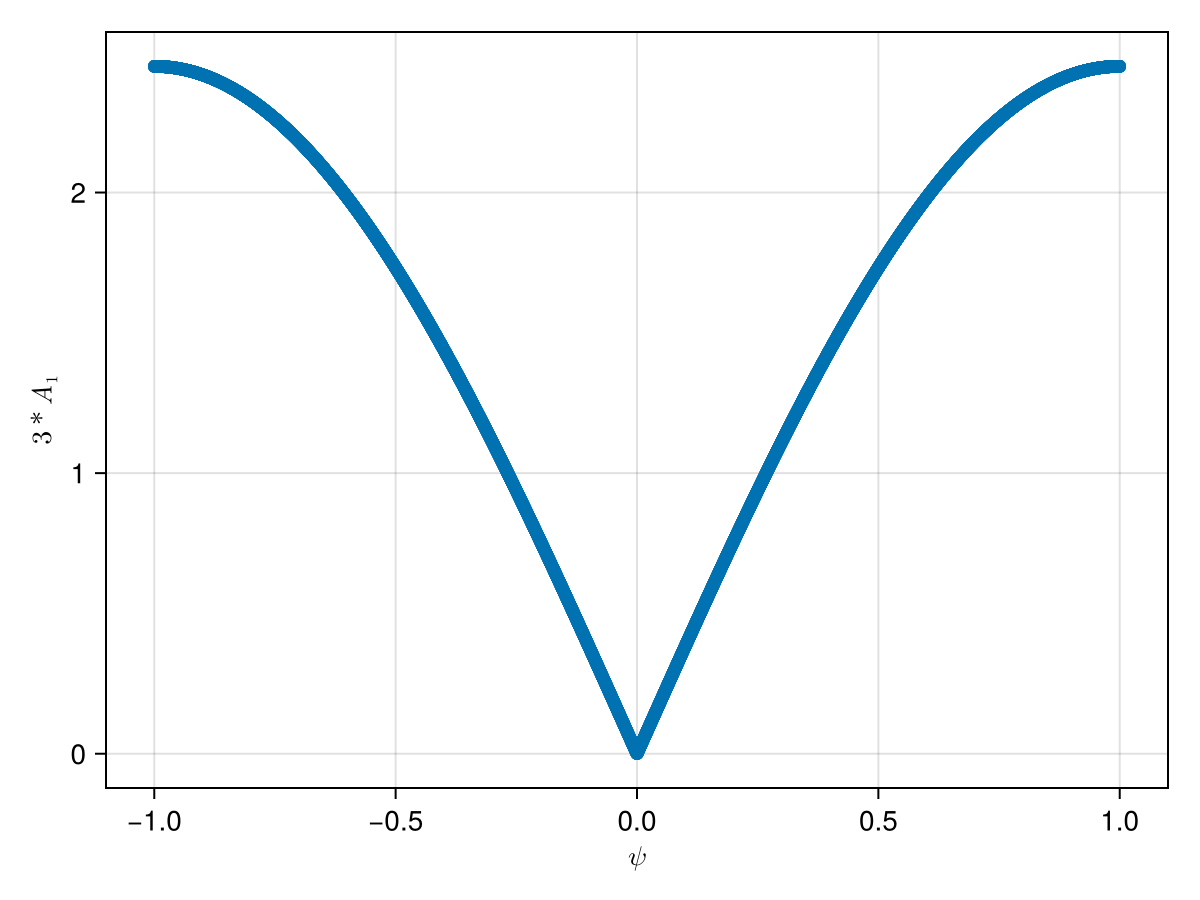

In [1433]:
alpha = exp(im * 0*pi/3)
# vF = 1/2 * abs(alpha) + 1/2 * abs(alpha) * abs(cos(3/2 * angle(alpha)))
vF = 1
# alpha = exp(-0.461834*pi*im)
a1_comp_test(alpha, vF)

In [1407]:
abs(cos(angle(alpha)))

0.5000000000000001

In [1405]:
ham1 = H_mft_v2([0.1, 0.1], 0, alpha) + H_k_v2([0.1, 0.1], vF)
display(ham1)
ham2 = H_mft_v2([0.1, 0.1], 0, alpha) + H_k_v2([0.1, 0.1], vF)
display(conj(ham2))

3×3 Matrix{ComplexF64}:
       0.05+0.0im        -0.0683013-0.118301im    0.0183013-0.0316987im
 -0.0683013+0.118301im    0.0183013+0.0im              0.05+0.0866025im
  0.0183013+0.0316987im        0.05-0.0866025im  -0.0683013+0.0im

3×3 Matrix{ComplexF64}:
       0.05-0.0im        -0.0683013+0.118301im    0.0183013+0.0316987im
 -0.0683013-0.118301im    0.0183013-0.0im              0.05-0.0866025im
  0.0183013-0.0316987im        0.05+0.0866025im  -0.0683013-0.0im

In [1104]:
function disc_int_bc_v2()
    angles = range(-pi, pi, 10^2)
    # vF_list = range(0, 3, 10^2)
    # grid = mesh_grid(angles, vF_list, Float64)
    vals = Array{Float64}(undef, length(angles))
    alpha = exp(im * pi/7)
    vF = 1/2 * abs(alpha) + 1/2 * abs(alpha) * abs(cos(3/2* angle(alpha)))
    for j in 1:length(angles)
        x = 2 * cos(angles[j])
        y = 2 * sin(angles[j])
        vals[j] = bc_no_spinors(reshape([x, y], (1, 2)), 10^(-1), vF, 0, alpha)[1]
    end
    P = Figure()
    ax1 = Axis(P[1, 1], 
    xlabel = L"\frac{1}{\pi}\arg(q)", 
    ylabel = L"\Omega(q_x, q_y) ")
    lines!(ax1, 1/pi * angles, vals)

    mags = range(0.1, 1, 10^2)
    vals = Array{Float64}(undef, length(mags))
    for j in 1:length(mags)
        x = mags[j] * cos(3*pi/5)
        y = mags[j] * sin(3*pi/5)
        vals[j] = bc_no_spinors(reshape([x, y], (1, 2)), 10^(-1), vF, 0, alpha)[1]
    end
    ax2 = Axis(P[1, 2], 
    xlabel = L"|q|", 
    ylabel = L"\Omega(q_x, q_y) ")
    lines!(ax2, mags, vals)

    P
    # for j in 1:size(grid, 1)
    #     vF = grid[j, 2]
    #     alpha = exp(im * grid[j, 1])
    #     # vals[j] = 1/(2*pi) * disc_int_connection(delta, alpha, vF, index, n_V, R)
    #     # vals[j] = explicit_og_bc_vF(delta, alpha/2, k+1, vF/2)
    #     vals[j] = bc_no_spinors(reshape([1000 * cos(4*pi/3), 1000 * sin(4*pi/3)], (1, 2)), 10^(-2), vF, delta, alpha)[1]
    # end

    # fig = Figure(size=(1500, 1000), fontsize=30)
    # ax1 = Axis(fig[1, 1], title = L"\frac{1}{2 \pi} \oiint \tilde{\Omega} dA \text{ vs } (\frac{1}{\pi} \arg[\alpha], \frac{v_F}{|\alpha|})", 
    # ylabel = L"\frac{v_F}{|\alpha|}", xlabel = L"\frac{1}{\pi} \arg[\alpha]")
    # tr1 = contourf!(ax1, 1/pi * grid[:, 1], grid[:, 2], vals, colormap = :RdBu)
    # #lines!(ax1, 1/pi * grid[:, 1], ones(length(vals)))
    # #lines!(ax1, 1/pi * grid[:, 1], 0.5*ones(length(vals)))
    # # tr1 = tricontourf!(ax1, grid[:, 1], grid[:, 2], vals, colormap = :RdBu)
    # cb1 = Colorbar(fig[1, 2], tr1)
    # fig
end

disc_int_bc_v2 (generic function with 2 methods)

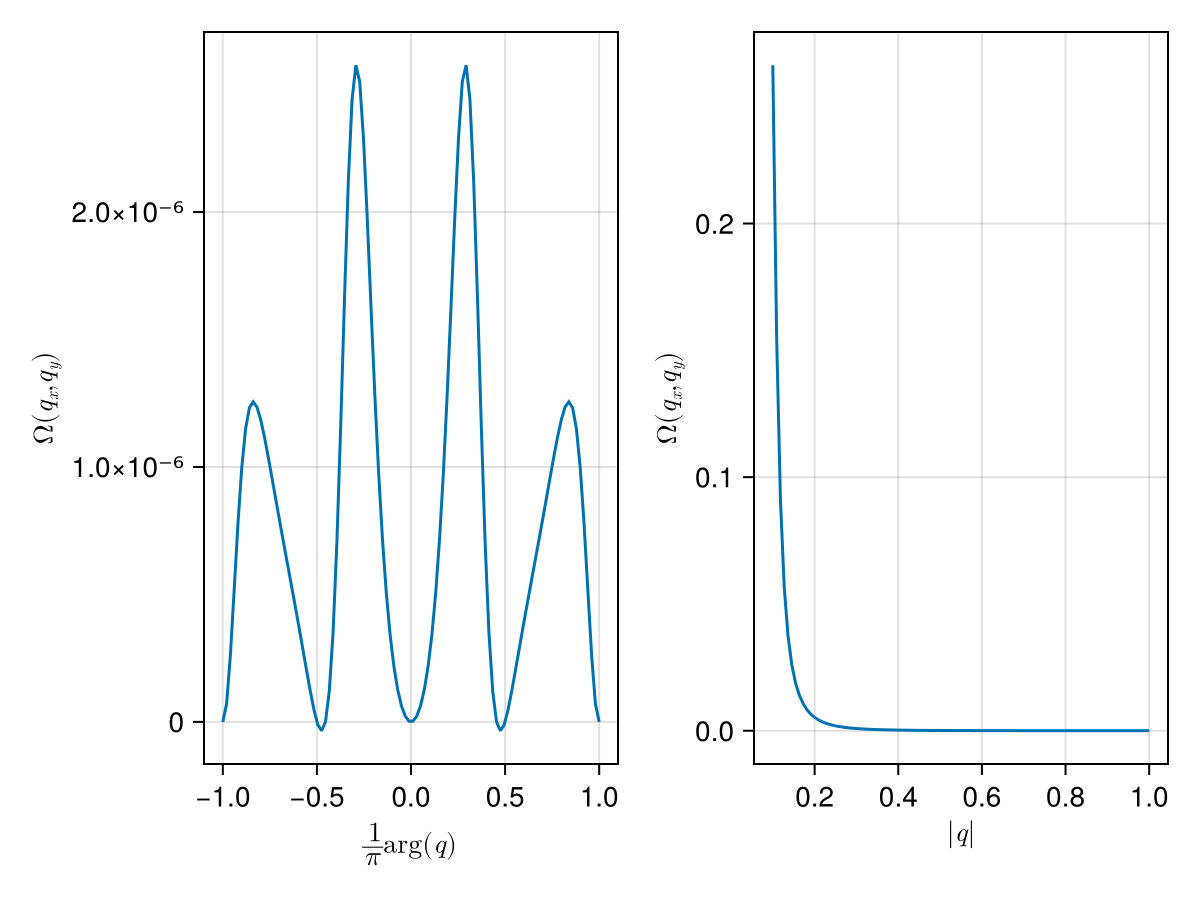

In [901]:
disc_int_bc_v2()

In [955]:
function plot_more_bc(alpha)
    x = range(-0.1, 0.1, 10^2)
    y = range(-0.1, 0.1, 10^2)
    grid = mesh_grid(x, y, Float64)
    z_list = Array{Float64}(undef, 10^4)
    vF = 1/2 * abs(alpha) + 1/3 * abs(alpha) * abs(cos(3/2 * angle(alpha)))
    z_list = [bc_no_spinors(reshape([qx, qy], (1, 2)), 10^(-7), vF, 0.000000001 * exp(im * pi/5), alpha)[1] for qx in x, qy in y]
   
    fig = Figure()
    ax = Axis(fig[1, 1], title="BC", xlabel=L"q_x", ylabel=L"q_y")
    cntr = contourf!(ax, x, y, z_list, colormap = :RdBu)
    cb1 = Colorbar(fig[1, 2], cntr)
    fig
end

plot_more_bc (generic function with 1 method)

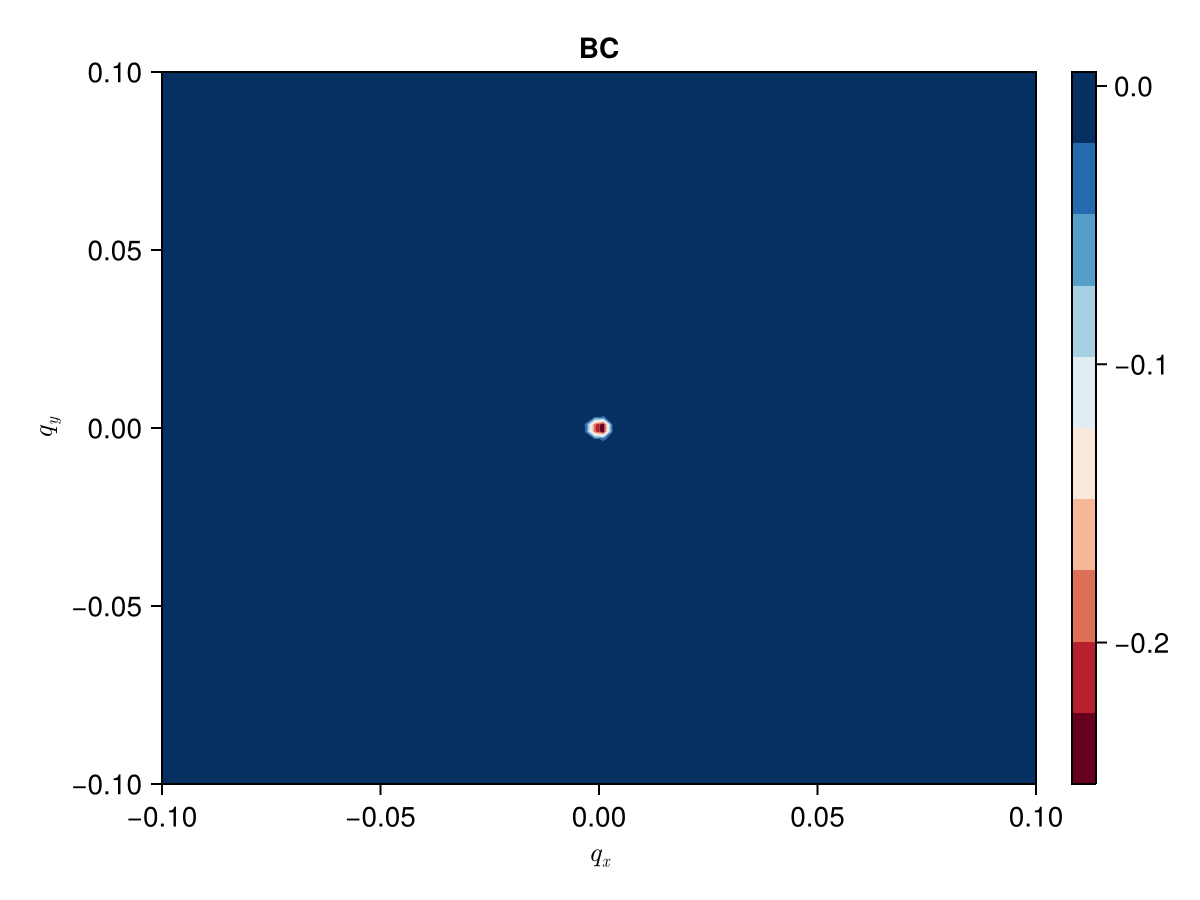

In [956]:
plot_more_bc(exp(im*3*pi/4))

In [41]:
alpha = exp(im * pi/5)
vF = 0
delta = 0
coord = reshape([1, 1], (1, 2))
ham = H_mft_v2(coord, delta, alpha) + H_k_v2(coord, vF)
display(ham)

3×3 Matrix{ComplexF64}:
      0.0+0.0im       -1.10514-0.80293im   0.296121-0.215144im
 -1.10514+0.80293im        0.0+0.0im       0.809017+0.587785im
 0.296121+0.215144im  0.809017-0.587785im       0.0+0.0im

In [44]:
alpha = exp(im * pi/5) * exp(im * pi/6)
vF = 0
delta = 0
coord = reshape([1, 1], (1, 2))
ham = H_mft_v2(coord, delta, alpha) + H_k_v2(coord, vF)
display(ham)

3×3 Matrix{ComplexF64}:
       0.0+0.0im       -0.555613-1.24793im   0.148876-0.334381im
 -0.555613+1.24793im         0.0+0.0im       0.406737+0.913545im
  0.148876+0.334381im   0.406737-0.913545im       0.0+0.0im

In [1713]:
P = [[1, 1, 1] [1, omega, conj(omega)] [1, conj(omega), omega]]
P0 = [[0, 1, 0] [0, 0, 1] [1, 0, 0]]
display(P0)
display(P0*P * conj(ham) * inv(P0*P))

3×3 Matrix{Int64}:
 0  0  1
 1  0  0
 0  1  0

3×3 Matrix{ComplexF64}:
 1.66533e-16+0.0im       …      0.389349+0.389349im
   -0.390074-0.390074im          1.16877-1.16877im
    0.389349-0.389349im     -1.11022e-16-1.66533e-16im

In [1658]:
bc_no_spinors(reshape([1, 1], (1, 2)), 10^(-2), vF, 0, alpha)[1]

8.311459980183668e-9

## C3 Symmetry

In [71]:
coord = 0.1 * [cos(0), sin(0)]
P0 = [[0, 0, 1] [1, 0, 0] [0, 1, 0]]
display(P0)
ham = H_mft_v2(coord, delta, alpha) + H_k_v2(coord, vF)
display(ham)
coord2 = 0.1 * [cos(2*pi/3), sin(2*pi/3)]
ham2 = P0 * (H_mft_v2(coord2, delta, alpha) + H_k_v2(coord2, vF)) * inv(P0)
display(ham2)

3×3 Matrix{Int64}:
 0  1  0
 0  0  1
 1  0  0

3×3 Matrix{ComplexF64}:
 0.0975528+0.0im          0.91642+0.386331im     0.91642-0.386331im
   0.91642-0.386331im  -0.0487764+0.0im         0.870067+0.528989im
   0.91642+0.386331im    0.870067-0.528989im  -0.0487764+0.0im

3×3 Matrix{ComplexF64}:
 0.0975528+0.0im          0.91642+0.386331im     0.91642-0.386331im
   0.91642-0.386331im  -0.0487764+0.0im         0.870067+0.528989im
   0.91642+0.386331im    0.870067-0.528989im  -0.0487764+0.0im

## $M_y$ Symmetry

In [72]:
coord = 0.1 * [cos(pi/8), sin(pi/8)]
P1 = [[1, 0, 0] [0, 0, 1] [0, 1, 0]]
display(P1)
ham = H_mft_v2(coord, delta, alpha) + H_k_v2(coord, vF)
display(ham)
coord2 = 0.1 * [cos(pi/8), -sin(pi/8)]
ham2 = P1 * conj(H_mft_v2(coord2, delta, alpha) + H_k_v2(coord2, vF)) * inv(P1)
display(ham2)

3×3 Matrix{Int64}:
 1  0  0
 0  0  1
 0  1  0

3×3 Matrix{ComplexF64}:
 0.0901271+0.0im         0.925485+0.358431im    0.905002-0.42147im
  0.925485-0.358431im  -0.0127332+0.0im         0.872419+0.52175im
  0.905002+0.42147im     0.872419-0.52175im   -0.0773939+0.0im

3×3 Matrix{ComplexF64}:
 0.0901271+0.0im         0.925485+0.358431im    0.905002-0.42147im
  0.925485-0.358431im  -0.0127332+0.0im         0.872419+0.52175im
  0.905002+0.42147im     0.872419-0.52175im   -0.0773939+0.0im

## Phase Translation symmetries

In [84]:
omega = exp(im * 2 * pi/3)
delta = exp(im * pi/5)
alpha = exp(im * pi/7)
vF = 0.8
display(bc_no_spinors(reshape([0, 0], (1, 2)), 10^(-3), vF, delta, alpha))
delta1 = exp(im * pi/5) * omega
alpha1 = exp(im * pi/7) * omega
vF = 0.8
display(bc_no_spinors(reshape([0, 0], (1, 2)), 10^(-3), vF, delta1, alpha1))

1-element Vector{Float64}:
 0.7986504616819545

1-element Vector{Float64}:
 0.7986504616640653